# Telecommunications Attrition Investigation

## Planning: Developing objectives for the investigation

To address employee attrition at the telecommunications company, this notebook will build a model to predict employee attrition and identify influencing factors that impact an employee's decision to leave or stay in the company.

Objectives

1. Model the probability of attrition amongst employees
2. Develop strategies to reduce the current attrition rate.
3. Develop recommendations to improve the efficiency of the data collection/analysis process

### Data Dictionary

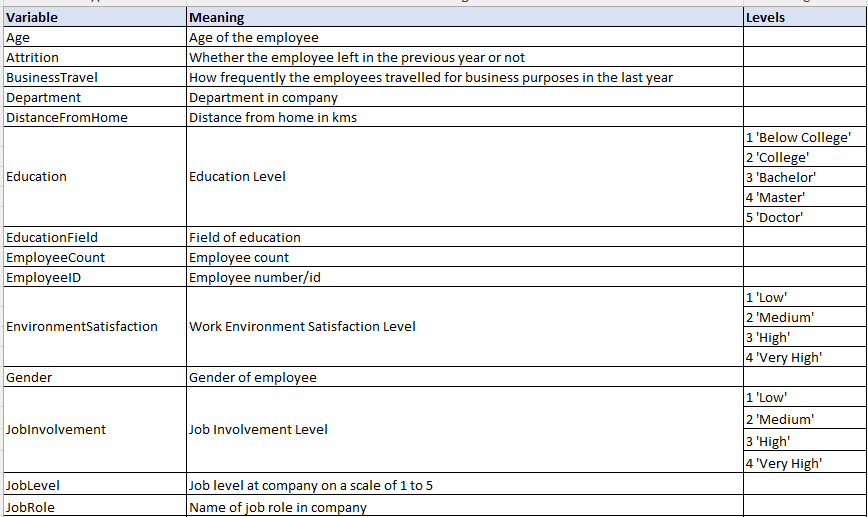

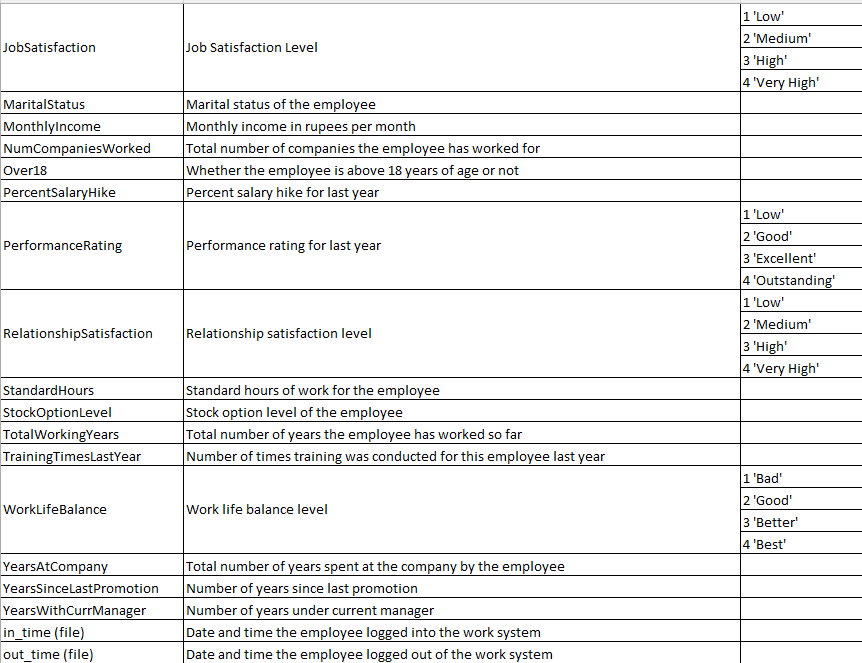

### Importing Data

In [1]:
# Importing Data Manipulation & Visualization packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the data
employee_survey = pd.read_excel('/content/drive/MyDrive/Canonical test/empsurvey.xlsx')
general_data = pd.read_excel('/content/drive/MyDrive/Canonical test/gendata.xlsx')
in_time = pd.read_excel('/content/drive/MyDrive/Canonical test/in.xlsx')
manager_survey = pd.read_excel('/content/drive/MyDrive/Canonical test/mansurvey.xlsx')
out_time = pd.read_excel('/content/drive/MyDrive/Canonical test/out.xlsx')

### Understanding the Data

In [3]:
general_data.head().T

0                       1  \
Age                                             51                      31   
Attrition                                       No                     Yes   
BusinessTravel                       Travel_Rarely       Travel_Frequently   
Department                                   Sales  Research & Development   
DistanceFromHome                                 6                      10   
Education                                        2                       1   
EducationField                       Life Sciences           Life Sciences   
EmployeeCount                                    1                       1   
EmployeeID                                       1                       2   
Gender                                      Female                  Female   
JobLevel                                         1                       1   
JobRole                  Healthcare Representative      Research Scientist   
MaritalStatus                              Married                  Single   
MonthlyIncome                               131160                   41890   
NumCompaniesWorked                             1.0                     0.0   
Over18                                           Y                       Y   
PercentSalaryHike                               11                      23   
StandardHours                                    8                       8   
StockOptionLevel                                 0                       1   
TotalWorkingYears                              1.0                     6.0   
TrainingTimesLastYear                            6                       3   
YearsAtCompany                                   1                       5   
YearsSinceLastPromotion                          0                       1   
YearsWithCurrManager                             0                       4   

                                              2                       3  \
Age                                          32                      38   
Attrition                                    No                      No   
BusinessTravel                Travel_Frequently              Non-Travel   
Department               Research & Development  Research & Development   
DistanceFromHome                             17                       2   
Education                                     4                       5   
EducationField                            Other           Life Sciences   
EmployeeCount                                 1                       1   
EmployeeID                                    3                       4   
Gender                                     Male                    Male   
JobLevel                                      4                       3   
JobRole                         Sales Executive         Human Resources   
MaritalStatus                           Married                 Married   
MonthlyIncome                            193280                   83210   
NumCompaniesWorked                          1.0                     3.0   
Over18                                        Y                       Y   
PercentSalaryHike                            15                      11   
StandardHours                                 8                       8   
StockOptionLevel                              3                       3   
TotalWorkingYears                           5.0                    13.0   
TrainingTimesLastYear                         2                       5   
YearsAtCompany                                5                       8   
YearsSinceLastPromotion                       0                       7   
YearsWithCurrManager                          3                       5   

                                              4  
Age                                          32  
Attrition                                    No  
BusinessTravel                    Travel_Rarely  
Department            

In [4]:
employee_survey.head().T

0    1    2    3    4
EmployeeID               1.0  2.0  3.0  4.0  5.0
EnvironmentSatisfaction  3.0  3.0  2.0  4.0  4.0
JobSatisfaction          4.0  2.0  2.0  4.0  1.0
WorkLifeBalance          2.0  4.0  1.0  3.0  3.0

In [5]:
manager_survey.head().T

0  1  2  3  4
EmployeeID         1  2  3  4  5
JobInvolvement     3  2  3  2  3
PerformanceRating  3  4  3  3  3

In [6]:
in_time.head().T

0                    1  \
Unnamed: 0                             1                    2   
2015-01-01 00:00:00                  NaN                  NaN   
2015-01-02 00:00:00  2015-01-02 09:43:45  2015-01-02 10:15:44   
2015-01-05 00:00:00  2015-01-05 10:08:48  2015-01-05 10:21:05   
2015-01-06 00:00:00  2015-01-06 09:54:26                  NaT   
...                                  ...                  ...   
2015-12-25 00:00:00                  NaN                  NaN   
2015-12-28 00:00:00  2015-12-28 10:13:41  2015-12-28 09:31:45   
2015-12-29 00:00:00  2015-12-29 10:03:36  2015-12-29 09:55:49   
2015-12-30 00:00:00  2015-12-30 09:54:12  2015-12-30 10:32:25   
2015-12-31 00:00:00  2015-12-31 10:12:44  2015-12-31 09:27:20   

                                       2                    3  \
Unnamed: 0                             3                    4   
2015-01-01 00:00:00                  NaN                  NaN   
2015-01-02 00:00:00  2015-01-02 10:17:41  2015-01-02 10:05:06   
2015-01-05 00:00:00  2015-01-05 09:50:50  2015-01-05 09:56:32   
2015-01-06 00:00:00  2015-01-06 10:14:13  2015-01-06 10:11:07   
...                                  ...                  ...   
2015-12-25 00:00:00                  NaN                  NaN   
2015-12-28 00:00:00  2015-12-28 09:42:05  2015-12-28 09:52:44   
2015-12-29 00:00:00  2015-12-29 09:43:36  2015-12-29 09:33:16   
2015-12-30 00:00:00  2015-12-30 09:34:05  2015-12-30 10:18:12   
2015-12-31 00:00:00  2015-12-31 10:28:39  2015-12-31 10:01:15   

                                       4  
Unnamed: 0                             5  
2015-01-01 00:00:00                  NaN  
2015-01-02 00:00:00  2015-01-02 10:28:17  
2015-01-05 00:00:00  2015-01-05 09:49:58  
2015-01-06 00:00:00  2015-01-06 09:45:28  
...                                  ...  
2015-12-25 00:00:00                  NaN  
2015-12-28 00:00:00  2015-12-28 10:05:15  
2015-12-29 00:00:00  2015-12-29 10:30:53  
2015-12-30 00:00:00  2015-12-30 09:18:21  
2015-12-31 00:00:00  2015-12-31 09:41:09  

[262 rows x 5 columns]

In [7]:
out_time.head().T

0                    1  \
Unnamed: 0                             1                    2   
2015-01-01 00:00:00                  NaN                  NaN   
2015-01-02 00:00:00  2015-01-02 16:56:15  2015-01-02 18:22:17   
2015-01-05 00:00:00  2015-01-05 17:20:11  2015-01-05 17:48:22   
2015-01-06 00:00:00  2015-01-06 17:19:05                  NaT   
...                                  ...                  ...   
2015-12-25 00:00:00                  NaN                  NaN   
2015-12-28 00:00:00  2015-12-28 18:00:07  2015-12-28 17:08:38   
2015-12-29 00:00:00  2015-12-29 17:22:30  2015-12-29 17:54:46   
2015-12-30 00:00:00  2015-12-30 17:40:56  2015-12-30 18:31:35   
2015-12-31 00:00:00  2015-12-31 17:17:33  2015-12-31 17:40:58   

                                       2                    3  \
Unnamed: 0                             3                    4   
2015-01-01 00:00:00                  NaN                  NaN   
2015-01-02 00:00:00  2015-01-02 16:59:14  2015-01-02 17:25:24   
2015-01-05 00:00:00  2015-01-05 17:06:46  2015-01-05 17:14:03   
2015-01-06 00:00:00  2015-01-06 16:38:32  2015-01-06 17:07:42   
...                                  ...                  ...   
2015-12-25 00:00:00                  NaN                  NaN   
2015-12-28 00:00:00  2015-12-28 16:43:31  2015-12-28 17:19:34   
2015-12-29 00:00:00  2015-12-29 17:09:56  2015-12-29 16:58:16   
2015-12-30 00:00:00  2015-12-30 17:06:25  2015-12-30 17:40:11   
2015-12-31 00:00:00  2015-12-31 17:15:50  2015-12-31 17:09:14   

                                       4  
Unnamed: 0                             5  
2015-01-01 00:00:00                  NaN  
2015-01-02 00:00:00  2015-01-02 18:31:37  
2015-01-05 00:00:00  2015-01-05 17:49:15  
2015-01-06 00:00:00  2015-01-06 17:26:25  
...                                  ...  
2015-12-25 00:00:00                  NaN  
2015-12-28 00:00:00  2015-12-28 17:44:59  
2015-12-29 00:00:00  2015-12-29 18:47:00  
2015-12-30 00:00:00  2015-12-30 17:15:33  
2015-12-31 00:00:00  2015-12-31 17:42:14  

[262 rows x 5 columns]

### Data Cleaning

Rename columns, Treat Missing Values and Duplicate(s)

In [8]:
# Rename column unnamed for in time and out time as employeeid

in_time.rename(columns={in_time.columns[0]: "EmployeeID"}, inplace=True)
out_time.rename(columns={out_time.columns[0]: "EmployeeID"}, inplace=True)


In [9]:
# Check for missing values in each dataset
missing_values_general_data = general_data.isna().sum()
missing_values_employee_survey = employee_survey.isna().sum()
missing_values_manager_survey = manager_survey.isna().sum()
missing_values_in_time = in_time.isna().sum()
missing_values_out_time = out_time.isna().sum()

# Print the results
print("Missing values in general_data:\n", missing_values_general_data)
print("\nMissing values in employee_survey:\n", missing_values_employee_survey)
print("\nMissing values in manager_survey:\n", missing_values_manager_survey)
print("\nMissing values in in_time:\n", missing_values_in_time)
print("\nMissing values in out_time:\n", missing_values_out_time)


Missing values in general_data:
 Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

Missing values in employee_survey:
 EmployeeID                  0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64

Missing values in manager_survey:
 EmployeeID           0
JobIn

It appears that general_data and employee_survey have NA values, while in_time and out_time NA values represent employees taking time off and is not an error.

In [10]:
# Average numcompanies worked based on age and fill na for numcompanies worked

# Group by age and calculate the average of NumCompaniesWorked, TotalWorkingHours
avg_numcompanies_by_age = general_data.groupby('Age')['NumCompaniesWorked'].mean()
avg_totalworkingyears = general_data.groupby('Age')['TotalWorkingYears'].mean()

# Fill missing values in NumCompaniesWorked,TotalWorkignHours with the corresponding average based on age
general_data['NumCompaniesWorked'].fillna(general_data.groupby('Age')['NumCompaniesWorked'].transform('mean'), inplace=True)
general_data['TotalWorkingYears'].fillna(general_data.groupby('Age')['TotalWorkingYears'].transform('mean'), inplace=True)

general_data.isna().sum()


Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [11]:
# Filling in missing values with mean for employee survey

employee_survey = employee_survey.fillna(employee_survey.mean())


In [12]:
employee_survey.isna().sum()

EmployeeID                 0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
dtype: int64

In [13]:
# Check for duplicates in each dataset
duplicate_general_data = general_data.duplicated().sum()
duplicate_employee_survey = employee_survey.duplicated().sum()
duplicate_manager_survey = manager_survey.duplicated().sum()
duplicate_in_time = in_time.duplicated().sum()
duplicate_out_time = out_time.duplicated().sum()

# Print the results
print("Duplicate values in general_data:\n", duplicate_general_data)
print("\nDuplicate values in employee_survey:\n", duplicate_employee_survey)
print("\nDuplicate values in manager_survey:\n", duplicate_manager_survey)
print("\nDuplicate values in in_time:\n", duplicate_in_time)
print("\nDuplicate values in out_time:\n", duplicate_out_time)


Duplicate values in general_data:
 0

Duplicate values in employee_survey:
 0

Duplicate values in manager_survey:
 0

Duplicate values in in_time:
 0

Duplicate values in out_time:
 0


In [14]:
# Join employee survey with manager survey
survey_data = pd.merge(left=employee_survey, right=manager_survey, how='inner', on='EmployeeID')
survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4410 non-null   float64
 2   JobSatisfaction          4410 non-null   float64
 3   WorkLifeBalance          4410 non-null   float64
 4   JobInvolvement           4410 non-null   int64  
 5   PerformanceRating        4410 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 206.8 KB


In [15]:
survey_data.head()

EmployeeID  EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  \
0           1                      3.0              4.0              2.0   
1           2                      3.0              2.0              4.0   
2           3                      2.0              2.0              1.0   
3           4                      4.0              4.0              3.0   
4           5                      4.0              1.0              3.0   

   JobInvolvement  PerformanceRating  
0               3                  3  
1               2                  4  
2               3                  3  
3               2                  3  
4               3                  3

### Deconstructing time dataset and joining tables

In [16]:
# Make the [date_cols] as all columns except employeeid
date_cols = in_time.columns[1:]

# Extract the hhmmss only
def extract_time(x):
    if pd.notna(x):  # Check if the value is not NaT
        return x.time()
    else:
        return None  # Or any other suitable placeholder for missing times

in_time[date_cols] = in_time[date_cols].apply(lambda x: x.apply(extract_time))

In [17]:
# Convert time values into seconds in integer if not none

def convert_time_to_seconds(time_value):
  if time_value is not None:
    hours, minutes, seconds = time_value.hour, time_value.minute, time_value.second
    return hours * 3600 + minutes * 60 + seconds
  else:
    return None

in_time[date_cols] = in_time[date_cols].apply(lambda x: x.apply(convert_time_to_seconds))
in_time.head()


EmployeeID 2015-01-01 00:00:00  2015-01-02 00:00:00  2015-01-05 00:00:00  \
0           1                None              35025.0              36528.0   
1           2                None              36944.0              37265.0   
2           3                None              37061.0              35450.0   
3           4                None              36306.0              35792.0   
4           5                None              37697.0              35398.0   

   2015-01-06 00:00:00  2015-01-07 00:00:00  2015-01-08 00:00:00  \
0              35666.0              34471.0              35469.0   
1                  NaN              35117.0              36544.0   
2              36853.0              35247.0              36220.0   
3              36667.0              34650.0              36128.0   
4              35128.0              35377.0              37184.0   

   2015-01-09 00:00:00  2015-01-12 00:00:00  2015-01-13 00:00:00  ...  \
0              36565.0              34973.0              36786.0  ...   
1              35006.0              36007.0              38609.0  ...   
2              36349.0              36227.0              37286.0  ...   
3              36492.0              36822.0              35602.0  ...   
4              36050.0              37767.0              35972.0  ...   

  2015-12-18 00:00:00  2015-12-21 00:00:00  2015-12-22 00:00:00  \
0                 NaN              35729.0              36246.0   
1             38237.0              35342.0              38031.0   
2             36914.0              36628.0              35084.0   
3             37058.0              35901.0              36265.0   
4             35915.0              36221.0              36630.0   

   2015-12-23 00:00:00  2015-12-24 00:00:00  2015-12-25 00:00:00  \
0              36867.0              36695.0                 None   
1              36730.0                  NaN                 None   
2              36954.0              36446.0                 None   
3              36706.0              34995.0                 None   
4              36816.0              35064.0                 None   

   2015-12-28 00:00:00  2015-12-29 00:00:00 2015-12-30 00:00:00  \
0              36821.0              36216.0             35652.0   
1              34305.0              35749.0             37945.0   
2              34925.0              35016.0             34445.0   
3              35564.0              34396.0             37092.0   
4              36315.0              37853.0             33501.0   

   2015-12-31 00:00:00  
0              36764.0  
1              34040.0  
2              37719.0  
3              36075.0  
4              34869.0  

[5 rows x 262 columns]

In [18]:
# Get the mean and put it in a new column

in_time['Mean_Time_Seconds'] = in_time[date_cols].mean(axis=1)
in_time.head()

<ipython-input-18-46eab5779ac8>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  in_time['Mean_Time_Seconds'] = in_time[date_cols].mean(axis=1)


EmployeeID 2015-01-01 00:00:00  2015-01-02 00:00:00  2015-01-05 00:00:00  \
0           1                None              35025.0              36528.0   
1           2                None              36944.0              37265.0   
2           3                None              37061.0              35450.0   
3           4                None              36306.0              35792.0   
4           5                None              37697.0              35398.0   

   2015-01-06 00:00:00  2015-01-07 00:00:00  2015-01-08 00:00:00  \
0              35666.0              34471.0              35469.0   
1                  NaN              35117.0              36544.0   
2              36853.0              35247.0              36220.0   
3              36667.0              34650.0              36128.0   
4              35128.0              35377.0              37184.0   

   2015-01-09 00:00:00  2015-01-12 00:00:00  2015-01-13 00:00:00  ...  \
0              36565.0              34973.0              36786.0  ...   
1              35006.0              36007.0              38609.0  ...   
2              36349.0              36227.0              37286.0  ...   
3              36492.0              36822.0              35602.0  ...   
4              36050.0              37767.0              35972.0  ...   

  2015-12-21 00:00:00  2015-12-22 00:00:00  2015-12-23 00:00:00  \
0             35729.0              36246.0              36867.0   
1             35342.0              38031.0              36730.0   
2             36628.0              35084.0              36954.0   
3             35901.0              36265.0              36706.0   
4             36221.0              36630.0              36816.0   

   2015-12-24 00:00:00  2015-12-25 00:00:00  2015-12-28 00:00:00  \
0              36695.0                 None              36821.0   
1                  NaN                 None              34305.0   
2              36446.0                 None              34925.0   
3              34995.0                 None              35564.0   
4              35064.0                 None              36315.0   

   2015-12-29 00:00:00  2015-12-30 00:00:00 2015-12-31 00:00:00  \
0              36216.0              35652.0             36764.0   
1              35749.0              37945.0             34040.0   
2              35016.0              34445.0             37719.0   
3              34396.0              37092.0             36075.0   
4              37853.0              33501.0             34869.0   

   Mean_Time_Seconds  
0        36005.12069  
1       35957.063559  
2       36090.219008  
3       35934.587234  
4        35994.57551  

[5 rows x 263 columns]

In [19]:
# Count the number of times it is none in for each employee

in_time['None_Count'] = in_time[date_cols].isna().sum(axis=1)

<ipython-input-19-b14b386077ee>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  in_time['None_Count'] = in_time[date_cols].isna().sum(axis=1)


In [20]:
in_time['Mean_Time_In'] = in_time['Mean_Time_Seconds'].apply(lambda sec: f"{int(sec // 3600):02d}:{int((sec % 3600) // 60):02d}:{int(sec % 60):02d}")

<ipython-input-20-e60726eab4d6>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  in_time['Mean_Time_In'] = in_time['Mean_Time_Seconds'].apply(lambda sec: f"{int(sec // 3600):02d}:{int((sec % 3600) // 60):02d}:{int(sec % 60):02d}")


In [21]:
in_time.head()

EmployeeID 2015-01-01 00:00:00  2015-01-02 00:00:00  2015-01-05 00:00:00  \
0           1                None              35025.0              36528.0   
1           2                None              36944.0              37265.0   
2           3                None              37061.0              35450.0   
3           4                None              36306.0              35792.0   
4           5                None              37697.0              35398.0   

   2015-01-06 00:00:00  2015-01-07 00:00:00  2015-01-08 00:00:00  \
0              35666.0              34471.0              35469.0   
1                  NaN              35117.0              36544.0   
2              36853.0              35247.0              36220.0   
3              36667.0              34650.0              36128.0   
4              35128.0              35377.0              37184.0   

   2015-01-09 00:00:00  2015-01-12 00:00:00  2015-01-13 00:00:00  ...  \
0              36565.0              34973.0              36786.0  ...   
1              35006.0              36007.0              38609.0  ...   
2              36349.0              36227.0              37286.0  ...   
3              36492.0              36822.0              35602.0  ...   
4              36050.0              37767.0              35972.0  ...   

  2015-12-23 00:00:00  2015-12-24 00:00:00  2015-12-25 00:00:00  \
0             36867.0              36695.0                 None   
1             36730.0                  NaN                 None   
2             36954.0              36446.0                 None   
3             36706.0              34995.0                 None   
4             36816.0              35064.0                 None   

   2015-12-28 00:00:00  2015-12-29 00:00:00  2015-12-30 00:00:00  \
0              36821.0              36216.0              35652.0   
1              34305.0              35749.0              37945.0   
2              34925.0              35016.0              34445.0   
3              35564.0              34396.0              37092.0   
4              36315.0              37853.0              33501.0   

   2015-12-31 00:00:00  Mean_Time_Seconds None_Count  Mean_Time_In  
0              36764.0        36005.12069         29      10:00:05  
1              34040.0       35957.063559         25      09:59:17  
2              37719.0       36090.219008         19      10:01:30  
3              36075.0       35934.587234         26      09:58:54  
4              34869.0        35994.57551         16      09:59:54  

[5 rows x 265 columns]

In [22]:
# Getting mean_out_time for out_time dataset

out_time.columns = out_time.columns

date_cols = out_time.columns[1:]

out_time[date_cols] = out_time[date_cols].apply(lambda x: x.apply(extract_time))
out_time.head()

out_time[date_cols] = out_time[date_cols].apply(lambda x: x.apply(convert_time_to_seconds))
out_time.head()

out_time['Mean_Time_Seconds'] = out_time[date_cols].mean(axis=1)
out_time.head()

out_time['None_Count'] = out_time[date_cols].isna().sum(axis=1)
out_time['Mean_Time_Out'] = out_time['Mean_Time_Seconds'].apply(lambda sec: f"{int(sec // 3600):02d}:{int((sec % 3600) // 60):02d}:{int(sec % 60):02d}")
out_time.head()


<ipython-input-22-62507b06e9a2>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  out_time['Mean_Time_Seconds'] = out_time[date_cols].mean(axis=1)
<ipython-input-22-62507b06e9a2>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  out_time['None_Count'] = out_time[date_cols].isna().sum(axis=1)
<ipython-input-22-62507b06e9a2>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=

EmployeeID 2015-01-01 00:00:00  2015-01-02 00:00:00  2015-01-05 00:00:00  \
0           1                None              60975.0              62411.0   
1           2                None              66137.0              64102.0   
2           3                None              61154.0              61606.0   
3           4                None              62724.0              62043.0   
4           5                None              66697.0              64155.0   

   2015-01-06 00:00:00  2015-01-07 00:00:00  2015-01-08 00:00:00  \
0              62345.0              59695.0              61712.0   
1                  NaN              61746.0              63244.0   
2              59912.0              59601.0              62662.0   
3              61662.0              59560.0              60791.0   
4              62785.0              63479.0              64768.0   

   2015-01-09 00:00:00  2015-01-12 00:00:00  2015-01-13 00:00:00  ...  \
0              63509.0              61119.0              64978.0  ...   
1              60749.0              63408.0              64813.0  ...   
2              61050.0              62934.0              62485.0  ...   
3              62387.0              62017.0              61905.0  ...   
4              63848.0              67881.0              65698.0  ...   

  2015-12-23 00:00:00  2015-12-24 00:00:00  2015-12-25 00:00:00  \
0             60284.0              64042.0                 None   
1             63498.0                  NaN                 None   
2             61183.0              61105.0                 None   
3             63395.0              60501.0                 None   
4             64849.0              64762.0                 None   

   2015-12-28 00:00:00  2015-12-29 00:00:00  2015-12-30 00:00:00  \
0              64807.0              62550.0              63656.0   
1              61718.0              64486.0              66695.0   
2              60211.0              61796.0              61585.0   
3              62374.0              61096.0              63611.0   
4              63899.0              67620.0              62133.0   

   2015-12-31 00:00:00  Mean_Time_Seconds None_Count  Mean_Time_Out  
0              62253.0       62550.262931         29       17:22:30  
1              63658.0       63745.351695         25       17:42:25  
2              62150.0       61337.884298         19       17:02:17  
3              61754.0       61831.829787         26       17:10:31  
4              63734.0       64816.804082         16       18:00:16  

[5 rows x 265 columns]

In [23]:
# Join the mean tiem in and mean time out

in_out_time = pd.merge(in_time[['EmployeeID', 'Mean_Time_In']], out_time[['EmployeeID', 'Mean_Time_Out', 'None_Count']], on='EmployeeID')
in_out_time.rename(columns={'None_Count': 'Days_Off'}, inplace=True)
in_out_time.head()


EmployeeID Mean_Time_In Mean_Time_Out  Days_Off
0           1     10:00:05      17:22:30        29
1           2     09:59:17      17:42:25        25
2           3     10:01:30      17:02:17        19
3           4     09:58:54      17:10:31        26
4           5     09:59:54      18:00:16        16

In [24]:
# Convert 'Mean_Time_Out' and 'Mean_Time_In' to datetime objects
in_out_time['Mean_Time_Out'] = pd.to_datetime(in_out_time['Mean_Time_Out'], format='%H:%M:%S').dt.time
in_out_time['Mean_Time_In'] = pd.to_datetime(in_out_time['Mean_Time_In'], format='%H:%M:%S').dt.time

# Calculate time difference and convert to hours
in_out_time['Hours_Worked'] = (pd.to_datetime(in_out_time['Mean_Time_Out'].astype(str)) -
                               pd.to_datetime(in_out_time['Mean_Time_In'].astype(str))).dt.total_seconds() / 3600

in_out_time.head()

<ipython-input-24-bdec90d92885>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  in_out_time['Hours_Worked'] = (pd.to_datetime(in_out_time['Mean_Time_Out'].astype(str)) -
<ipython-input-24-bdec90d92885>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(in_out_time['Mean_Time_In'].astype(str))).dt.total_seconds() / 3600


EmployeeID Mean_Time_In Mean_Time_Out  Days_Off  Hours_Worked
0           1     10:00:05      17:22:30        29      7.373611
1           2     09:59:17      17:42:25        25      7.718889
2           3     10:01:30      17:02:17        19      7.013056
3           4     09:58:54      17:10:31        26      7.193611
4           5     09:59:54      18:00:16        16      8.006111

In [25]:
# Drop mean time in mean time out
in_out_time.drop(columns=['Mean_Time_Out', 'Mean_Time_In'], axis=1, inplace=True)


In [26]:
# Joining all tables
df = pd.merge(in_out_time, survey_data, on='EmployeeID')
df = pd.merge(df, general_data, on='EmployeeID')
df.head().T

0                       1  \
EmployeeID                                       1                       2   
Days_Off                                        29                      25   
Hours_Worked                              7.373611                7.718889   
EnvironmentSatisfaction                        3.0                     3.0   
JobSatisfaction                                4.0                     2.0   
WorkLifeBalance                                2.0                     4.0   
JobInvolvement                                   3                       2   
PerformanceRating                                3                       4   
Age                                             51                      31   
Attrition                                       No                     Yes   
BusinessTravel                       Travel_Rarely       Travel_Frequently   
Department                                   Sales  Research & Development   
DistanceFromHome                                 6                      10   
Education                                        2                       1   
EducationField                       Life Sciences           Life Sciences   
EmployeeCount                                    1                       1   
Gender                                      Female                  Female   
JobLevel                                         1                       1   
JobRole                  Healthcare Representative      Research Scientist   
MaritalStatus                              Married                  Single   
MonthlyIncome                               131160                   41890   
NumCompaniesWorked                             1.0                     0.0   
Over18                                           Y                       Y   
PercentSalaryHike                               11                      23   
StandardHours                                    8                       8   
StockOptionLevel                                 0                       1   
TotalWorkingYears                              1.0                     6.0   
TrainingTimesLastYear                            6                       3   
YearsAtCompany                                   1                       5   
YearsSinceLastPromotion                          0                       1   
YearsWithCurrManager                             0                       4   

                                              2                       3  \
EmployeeID                                    3                       4   
Days_Off                                     19                      26   
Hours_Worked                           7.013056                7.193611   
EnvironmentSatisfaction                     2.0                     4.0   
JobSatisfaction                             2.0                     4.0   
WorkLifeBalance                             1.0                     3.0   
JobInvolvement                                3                       2   
PerformanceRating                             3                       3   
Age                                          32                      38   
Attrition                                    No                      No   
BusinessTravel                Travel_Frequently              Non-Travel   
Department               Research & Development  Research & Development   
DistanceFromHome                             17                       2   
Education                                     4                       5   
EducationField                            Other           Life Sciences   
EmployeeCount                                 1                       1   
Gender                                     Male                    Male   
JobLevel                                      4                       3   
JobRole                         Sales Executive         Human Resources   
MaritalStatus                           Married     

## Analysis: Visualizing the distributions of each variable

### DF1 visualization dataset
df1 will be used as a spare dataset for visualization, while the df dataset will be used for onehotencoding and intial exploratory analysis

In [27]:
df['Attrition'] = df['Attrition'].replace('Yes', 1)
df['Attrition'] = df['Attrition'].replace('No', 0)
df1 = df.copy()


### Distribution of all variables and Correlation Heatmap

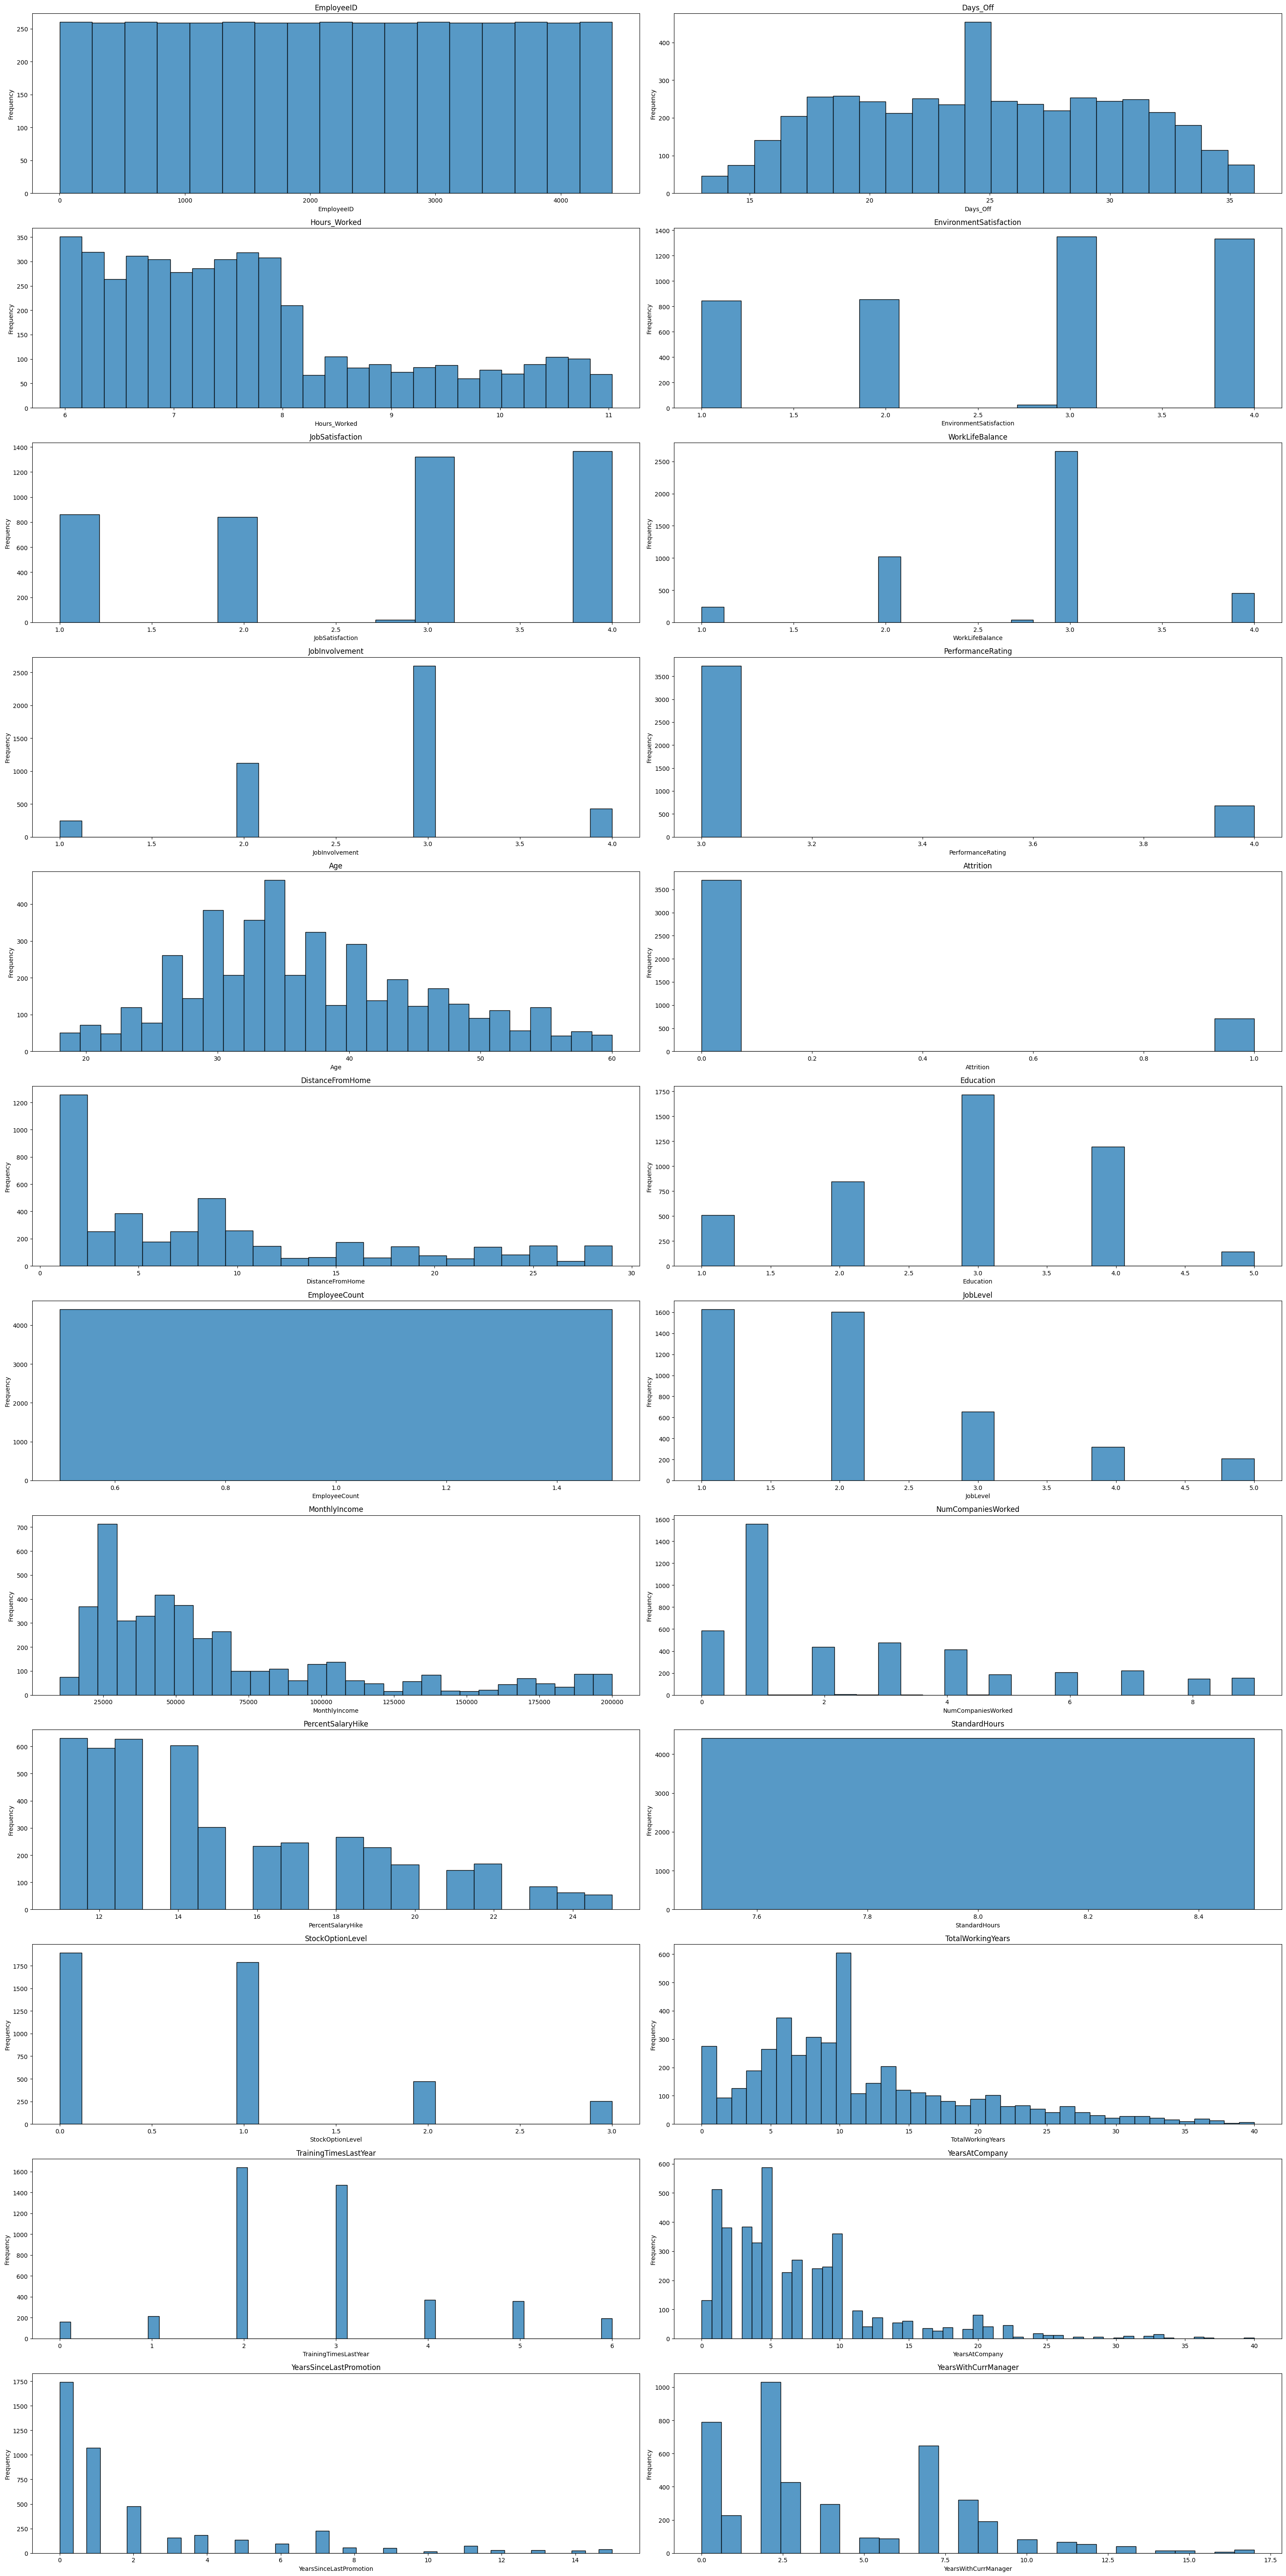

In [28]:
numeric_columns = df.select_dtypes(include=['number']).columns

# Calculate the number of rows for subplots, handling the case of an odd number of columns
num_rows = (len(numeric_columns) + 1) // 2

fig, axes = plt.subplots(num_rows, 2, figsize=(30, 60))  # Increase the figsize values for larger charts
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for i in range(len(numeric_columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

In [29]:
# Removing employeeid, employeecount and standardhours because there are no trends

df = df.drop(['EmployeeCount', 'StandardHours','EmployeeID'], axis=1)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Days_Off                 4410 non-null   int64  
 1   Hours_Worked             4410 non-null   float64
 2   EnvironmentSatisfaction  4410 non-null   float64
 3   JobSatisfaction          4410 non-null   float64
 4   WorkLifeBalance          4410 non-null   float64
 5   JobInvolvement           4410 non-null   int64  
 6   PerformanceRating        4410 non-null   int64  
 7   Age                      4410 non-null   int64  
 8   Attrition                4410 non-null   int64  
 9   BusinessTravel           4410 non-null   object 
 10  Department               4410 non-null   object 
 11  DistanceFromHome         4410 non-null   int64  
 12  Education                4410 non-null   int64  
 13  EducationField           4410 non-null   object 
 14  Gender                  

In [31]:
# Create dummies for categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns
df_dummies = pd.get_dummies(df[categorical_columns], drop_first=False)

# Concatenate the dummy variables with the original DataFrame
df = pd.concat([df, df_dummies], axis=1)

# Drop the original categorical columns
df.drop(categorical_columns, axis=1, inplace=True)

df.head().T


0         1         2         3  \
Days_Off                                 29        25        19        26   
Hours_Worked                       7.373611  7.718889  7.013056  7.193611   
EnvironmentSatisfaction                 3.0       3.0       2.0       4.0   
JobSatisfaction                         4.0       2.0       2.0       4.0   
WorkLifeBalance                         2.0       4.0       1.0       3.0   
JobInvolvement                            3         2         3         2   
PerformanceRating                         3         4         3         3   
Age                                      51        31        32        38   
Attrition                                 0         1         0         0   
DistanceFromHome                          6        10        17         2   
Education                                 2         1         4         5   
JobLevel                                  1         1         4         3   
MonthlyIncome                        131160     41890    193280     83210   
NumCompaniesWorked                      1.0       0.0       1.0       3.0   
PercentSalaryHike                        11        23        15        11   
StockOptionLevel                          0         1         3         3   
TotalWorkingYears                       1.0       6.0       5.0      13.0   
TrainingTimesLastYear                     6         3         2         5   
YearsAtCompany                            1         5         5         8   
YearsSinceLastPromotion                   0         1         0         7   
YearsWithCurrManager                      0         4         3         5   
BusinessTravel_Non-Travel             False     False     False      True   
BusinessTravel_Travel_Frequently      False      True      True     False   
BusinessTravel_Travel_Rarely           True     False     False     False   
Department_Human Resources            False     False     False     False   
Department_Research & Development     False      True      True      True   
Department_Sales                       True     False     False     False   
EducationField_Human Resources        False     False     False     False   
EducationField_Life Sciences           True      True     False      True   
EducationField_Marketing              False     False     False     False   
EducationField_Medical                False     False     False     False   
EducationField_Other                  False     False      True     False   
EducationField_Technical Degree       False     False     False     False   
Gender_Female                          True      True     False     False   
Gender_Male                           False     False      True      True   
JobRole_Healthcare Representative      True     False     False     False   
JobRole_Human Resources               False     False     False      True   
JobRole_Laboratory Technician         False     False     False     False   
JobRole_Manager                       False     False     False     False   
JobRole_Manufacturing Director        False     False     False     False   
JobRole_Research Director             False     False     False     False   
JobRole_Research Scientist            False      True     False     False   
JobRole_Sales Executive               False     False      True     False   
JobRole_Sales Representative          False     False     False     False   
MaritalStatus_Divorced                False     False     False     False   
MaritalStatus_Married                  True     False      True      True   
MaritalStatus_Single                  False      True     False     False   
Over18_Y                               True      True      True      True   

                                          4  
Days_Off                                 16  
Hours_Worked                       8.006111  
EnvironmentSatisfaction                 4.0  
JobSatisfaction                         1.0  
WorkLifeBalance                       

In [32]:
df = df.replace([True, False], [1, 0])


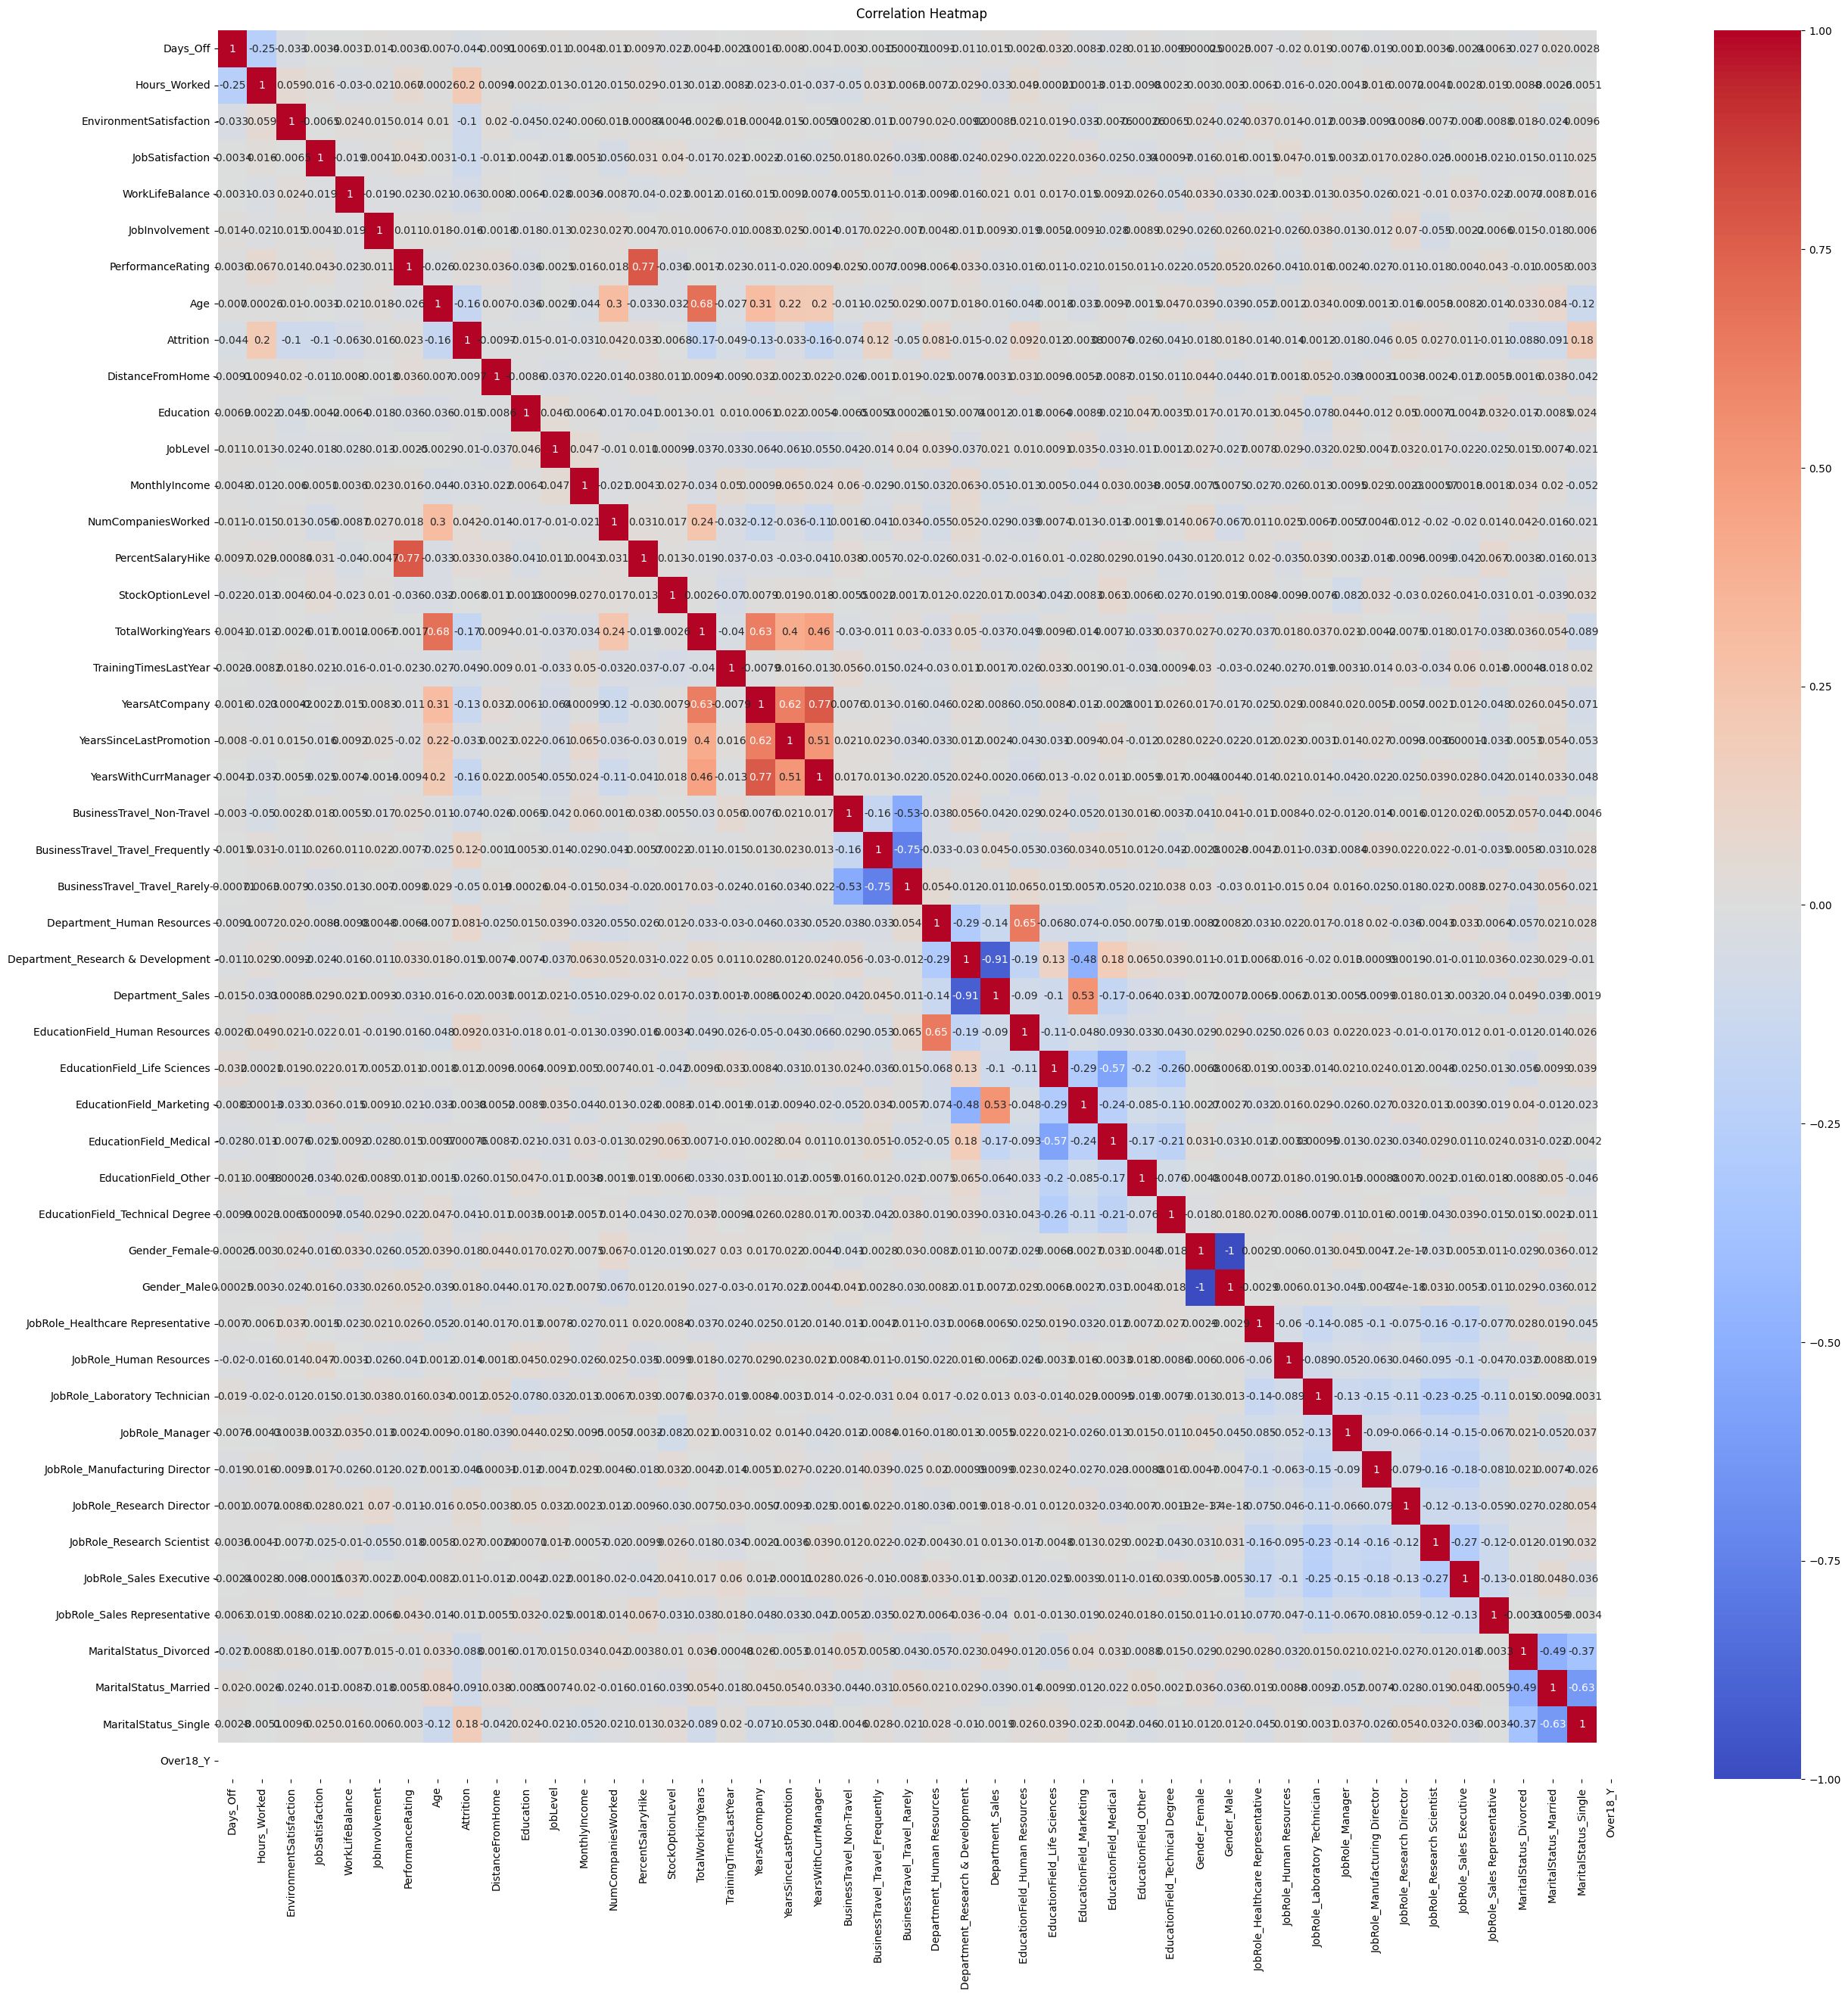

In [33]:
numeric_columns = df.select_dtypes(include=['number']).columns

# Correlation matrix for the numeric columns
correlation_matrix = df[numeric_columns].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(30, 30))
heatmap = sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

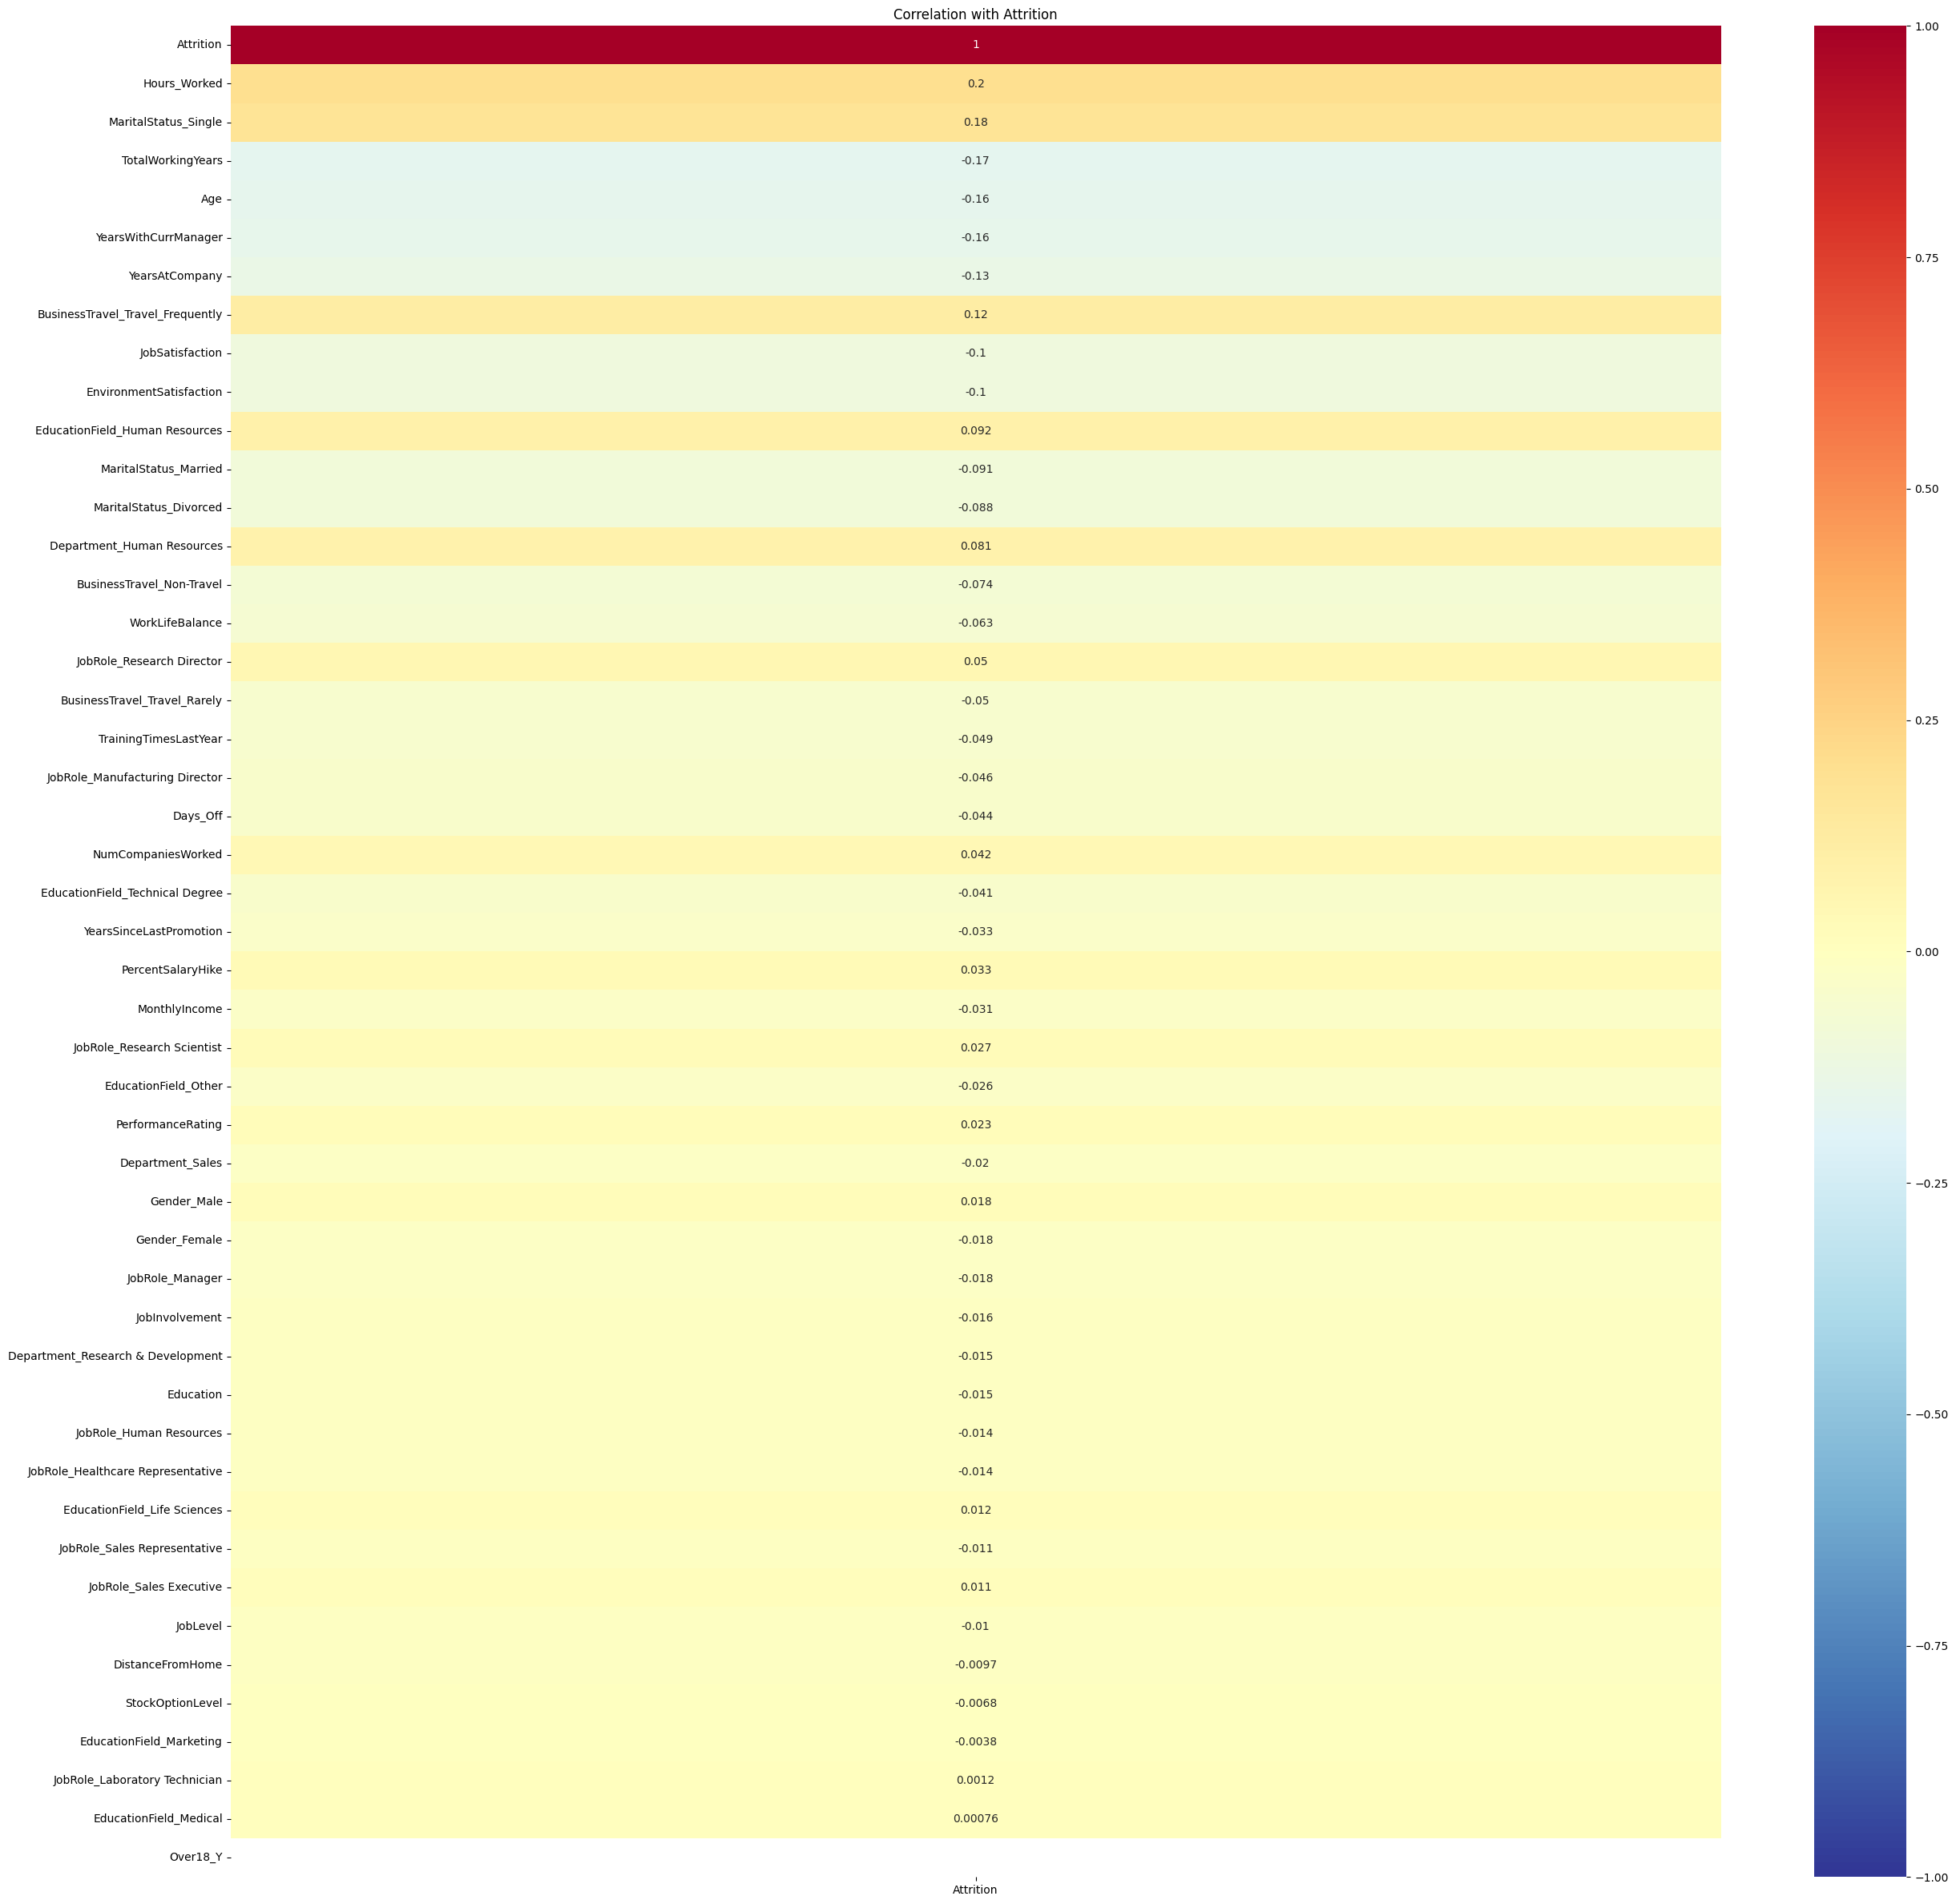

In [34]:
numeric_columns = df.select_dtypes(include=['number']).columns

# Correlation matrix for the numeric columns
correlation_matrix = df[numeric_columns].corr()
attrition_corr = correlation_matrix['Attrition']

# Sort in descending order
sorted_corr = attrition_corr.abs().sort_values(ascending=False)

# Heatmap of the sorted correlation values
plt.figure(figsize=(30, 30))
sns.heatmap(attrition_corr[sorted_corr.index].to_frame(), annot=True, cmap='RdYlBu_r', vmin=-1, vmax=1)
plt.title('Correlation with Attrition')
plt.show()

Based on the correlations, it is determined based on correlation to examine these variables:

0.2 Hours_Worked
0.18 MaritalStatus_Single
0.12 TravelFrequently
-0.1 EnvironmentalSatisfaction
-0.1 JobSatisfaction
-0.13 Years At Company
-0.16 Age
-0.16 Years with Current Manager
-0.17 Total Working Years

### Working Hours vs Attrition

We can see that the Number of Hours for employees that have stayed are around 1 hour less on average than employees who left.

This can mean that the telecommunications company may drive away employees because of overwork.

Employees who stay in the company work a similar amount of hours whether their performance review is higher or not. This is compared to the employees that have left, who work on average above 8 hours, reaching 9 or 10 in Q3.

<ipython-input-35-6e4c72253fd3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y='Hours_Worked', data=df1, palette=colors)
<ipython-input-35-6e4c72253fd3>:6: UserWarning: The palette list has more values (4410) than needed (2), which may not be intended.
  sns.boxplot(x='Attrition', y='Hours_Worked', data=df1, palette=colors)


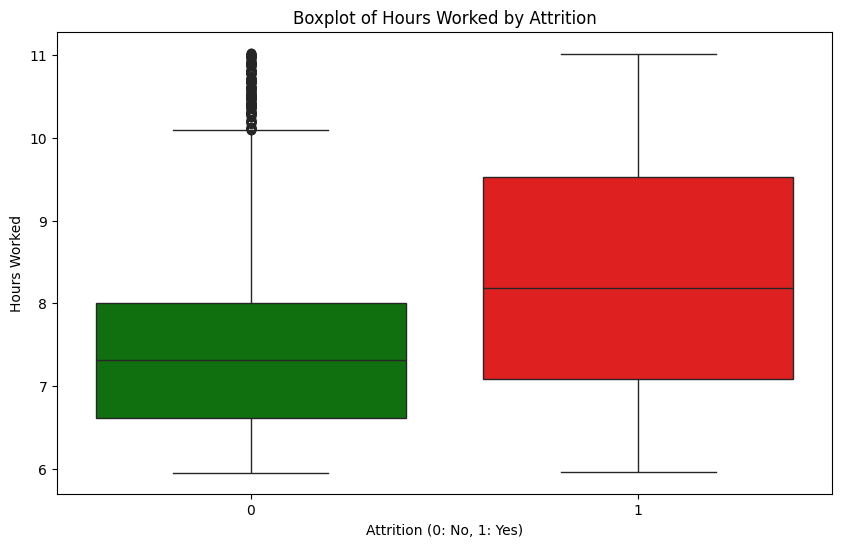

In [35]:
# Boxplot of hours_worked for attrition in df1

colors = ['green' if x == 0 else 'red' for x in df1['Attrition']]

plt.figure(figsize=(10, 6))  # Adjust the figure size as per your preference
sns.boxplot(x='Attrition', y='Hours_Worked', data=df1, palette=colors)

plt.title('Boxplot of Hours Worked by Attrition', fontsize=12)
plt.xlabel('Attrition (0: No, 1: Yes)')
plt.ylabel('Hours Worked')
plt.show()


### Marital Status vs Attrition

Employees who haven't married show a higher probability of leaving the company (25%) vs married (10%) or divorced (10%), perhaps because of their mobility or lack of financial responsibility

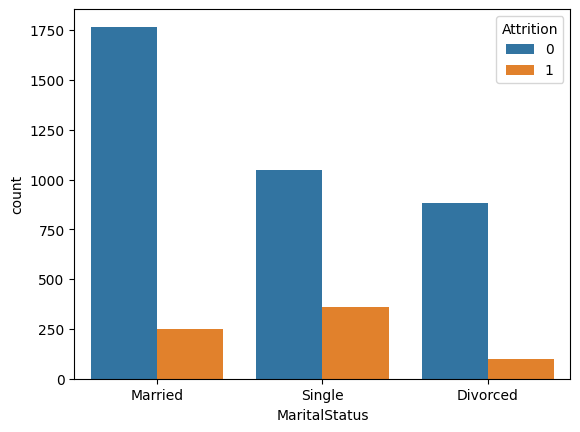

In [36]:
# Count chart for df1 based on marital status by attrition
sns.countplot(x="MaritalStatus", hue="Attrition", data=df1)
plt.show()


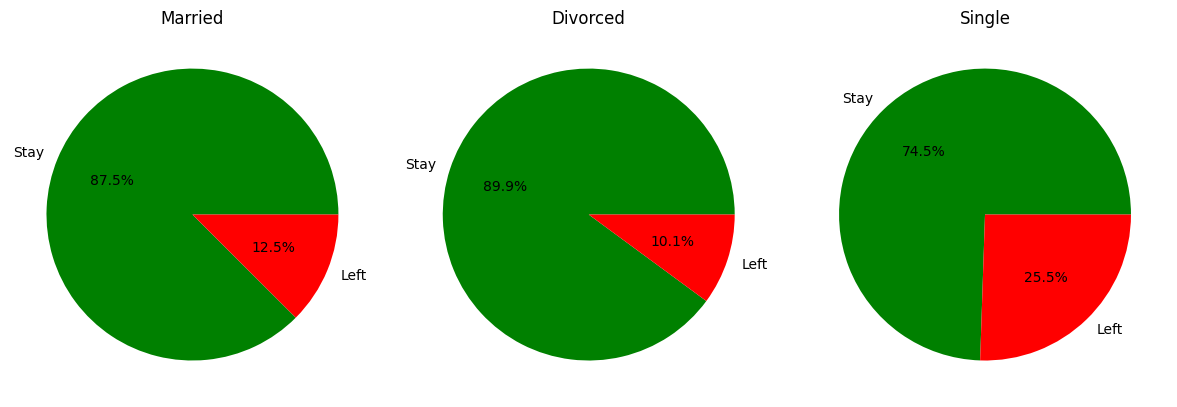

In [37]:
# Subset dataframe for each marital status
married_data = df1[df1['MaritalStatus'] == 'Married']
divorced_data = df1[df1['MaritalStatus'] == 'Divorced']
single_data = df1[df1['MaritalStatus'] == 'Single']

# Get the count of attrition
married_attrition_counts = married_data['Attrition'].value_counts()
divorced_attrition_counts = divorced_data['Attrition'].value_counts()
single_attrition_counts = single_data['Attrition'].value_counts()

# Set up the figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Plot Pie Charts
labels = ['Stay', 'Left']
axs[0].pie(married_attrition_counts, labels=labels, colors=['green', 'red'], autopct='%1.1f%%')
axs[0].set_title('Married')

axs[1].pie(divorced_attrition_counts, labels=labels, colors=['green', 'red'], autopct='%1.1f%%')
axs[1].set_title('Divorced')

axs[2].pie(single_attrition_counts, labels=labels, colors=['green', 'red'], autopct='%1.1f%%')
axs[2].set_title('Single')

plt.tight_layout()
plt.show()

### TotalWorkingYears vs Attrition

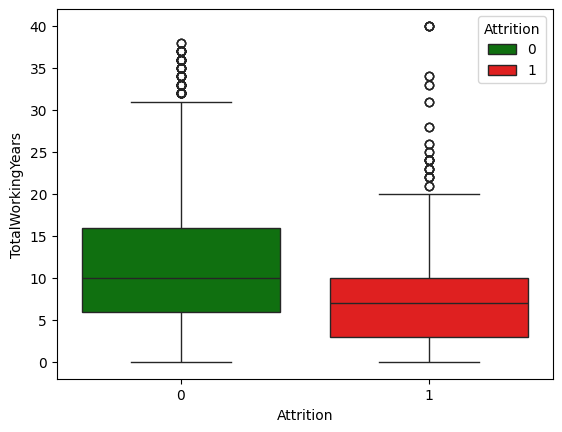

In [38]:
# Distribution of totalworkingyears vs attrition
sns.boxplot(x="Attrition", y="TotalWorkingYears", data=df1, hue = "Attrition",palette={1: "red", 0: "green"})
plt.show()


### Age vs Attrition

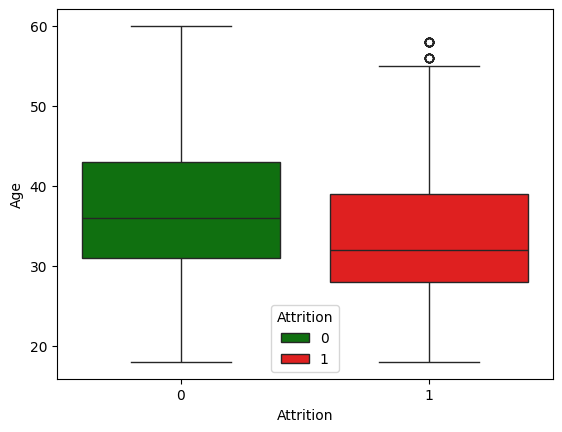

In [39]:
# Boxplot of totalworkingyears vs attrition
sns.boxplot(x="Attrition", y="Age", data=df1, hue = "Attrition",palette={1: "red", 0: "green"})
plt.show()


### YearsWithCurrentManager vs Attrition

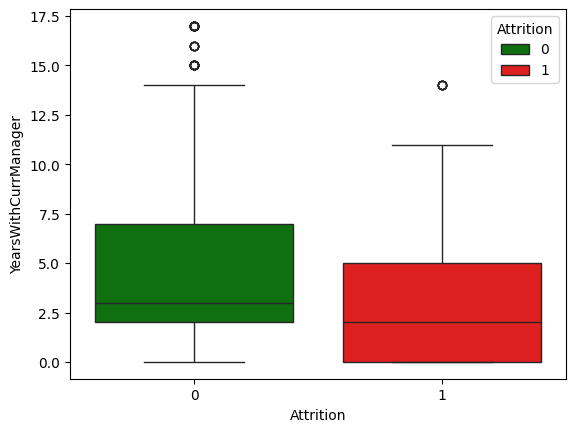

In [40]:
import matplotlib.pyplot as plt
# Create a boxplot of TotalWorkingYears vs Attrition
sns.boxplot(x="Attrition", y="YearsWithCurrManager", data=df1, hue = "Attrition",palette={1: "red", 0: "green"})

# Show the plot
plt.show()

### Travel Frequency vs Attrition

Employees who travel frequently are more likely to leave the company, possibly due to attachments to family and friends. However, when looking at the marital status, married employees do not exhibit high turnover, suggesting employees just don't want to travel a lot in general.

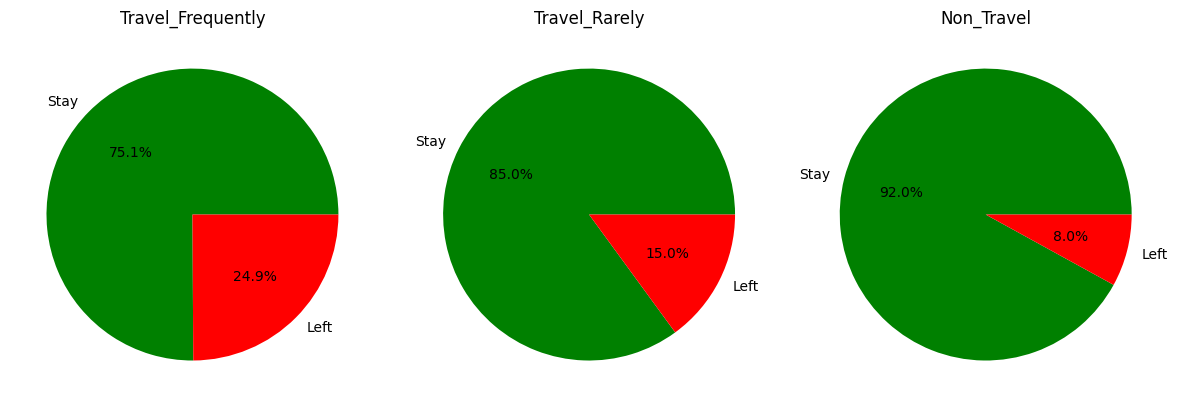

In [41]:
# Subset dataframe for travel frequency
Travel_Frequently_data = df1[df1['BusinessTravel'] == 'Travel_Frequently'] # Removed the trailing comma in 'Travel_Frequently,'
Travel_Rarely_data = df1[df1['BusinessTravel'] == 'Travel_Rarely']
Non_Travel_data = df1[df1['BusinessTravel'] == 'Non-Travel']

# Get the count of attrition
Travel_Frequently_attrition_counts = Travel_Frequently_data['Attrition'].value_counts()
Travel_Rarely_attrition_counts = Travel_Rarely_data['Attrition'].value_counts()
Non_Travel_attrition_counts = Non_Travel_data['Attrition'].value_counts()

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Plot {Pie Chart
labels = ['Stay', 'Left'] # Removed the extra label 'A'
axs[0].pie(Travel_Frequently_attrition_counts, labels=labels, colors=['green', 'red'], autopct='%1.1f%%')
axs[0].set_title('Travel_Frequently')

axs[1].pie(Travel_Rarely_attrition_counts, labels=labels, colors=['green', 'red'], autopct='%1.1f%%')
axs[1].set_title('Travel_Rarely')

axs[2].pie(Non_Travel_attrition_counts, labels=labels, colors=['green', 'red'], autopct='%1.1f%%')
axs[2].set_title('Non_Travel')

plt.tight_layout()
plt.show()

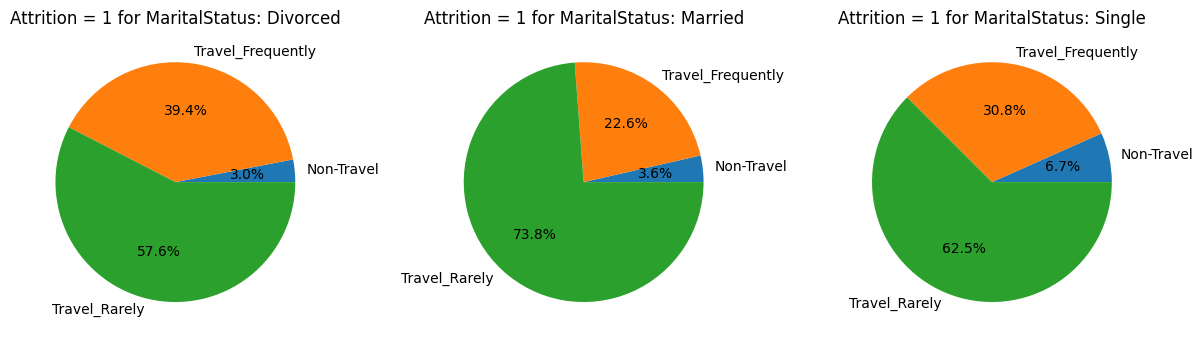

In [42]:
# Piechart for martialstatus vs businesstravel for attrition=1 in df1
df1_attrition_yes = df1[df1['Attrition'] == 1]

# Group the data by MaritalStatus and BusinessTravel
grouped_data = df1_attrition_yes.groupby(['MaritalStatus', 'BusinessTravel']).size().unstack()

fig, axs = plt.subplots(1 , 3, figsize=(12, 8))

# Plot Pie Charts
for i, marital_status in enumerate(grouped_data.index):
    axs[i].pie(grouped_data.loc[marital_status], labels=grouped_data.columns, autopct='%1.1f%%')
    axs[i].set_title(f'Attrition = 1 for MaritalStatus: {marital_status}')

plt.tight_layout()
plt.show()


### Attrition in different departments

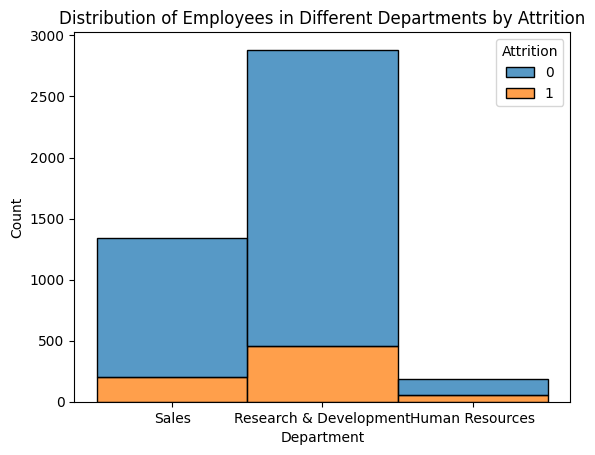

In [43]:
# Distribution for employees in different departments by attrition
sns.histplot(data=df1, x="Department", hue="Attrition", multiple="stack")
plt.title("Distribution of Employees in Different Departments by Attrition")
plt.show()


In [44]:
# Attrition rate for different departments, HR has highest attrition
attrition_rate_by_department = df1.groupby('Department')['Attrition'].mean()
print(attrition_rate_by_department)

Department
Human Resources           0.301587
Research & Development    0.157128
Sales                     0.150224
Name: Attrition, dtype: float64


### Attrition in different Job Roles

In [45]:
# Attrition rate for different JobRoles, HR has highest attrition
attrition_rate_by_JobRole = df1.groupby('JobRole')['Attrition'].mean()
attrition_rate_by_JobRole_sorted = attrition_rate_by_JobRole.sort_values(ascending=False)
print(attrition_rate_by_JobRole_sorted)

JobRole
Research Director            0.237500
Research Scientist           0.181507
Sales Executive              0.168712
Laboratory Technician        0.162162
Healthcare Representative    0.145038
Sales Representative         0.144578
Manager                      0.137255
Human Resources              0.134615
Manufacturing Director       0.110345
Name: Attrition, dtype: float64


## Construct: Developing the Predictive Model

Logistic Regression, Decision Trees, Random Forest and XGBoost will be used

### Preparing the Data

In [46]:
dfx = df.drop("Attrition" ,axis =1)
dfy = df["Attrition"]

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler_dfx = pd.DataFrame(scaler.fit_transform(dfx),columns = dfx.columns)
scaler_dfx.head(5)

Days_Off  Hours_Worked  EnvironmentSatisfaction  JobSatisfaction  \
0  0.695652      0.280098                 0.666667         1.000000   
1  0.521739      0.348059                 0.666667         0.333333   
2  0.260870      0.209131                 0.333333         0.333333   
3  0.565217      0.244669                 1.000000         1.000000   
4  0.130435      0.404593                 1.000000         0.000000   

   WorkLifeBalance  JobInvolvement  PerformanceRating       Age  \
0         0.333333        0.666667                0.0  0.785714   
1         1.000000        0.333333                1.0  0.309524   
2         0.000000        0.666667                0.0  0.333333   
3         0.666667        0.333333                0.0  0.476190   
4         0.666667        0.666667                0.0  0.333333   

   DistanceFromHome  Education  ...  JobRole_Manager  \
0          0.178571       0.25  ...              0.0   
1          0.321429       0.00  ...              0.0   
2          0.571429       0.75  ...              0.0   
3          0.035714       1.00  ...              0.0   
4          0.321429       0.00  ...              0.0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                             0.0                        0.0   
1                             0.0                        0.0   
2                             0.0                        0.0   
3                             0.0                        0.0   
4                             0.0                        0.0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                         0.0                      0.0   
1                         1.0                      0.0   
2                         0.0                      1.0   
3                         0.0                      0.0   
4                         0.0                      1.0   

   JobRole_Sales Representative  MaritalStatus_Divorced  \
0                           0.0                     0.0   
1                           0.0                     0.0   
2                           0.0                     0.0   
3                           0.0                     0.0   
4                           0.0                     0.0   

   MaritalStatus_Married  MaritalStatus_Single  Over18_Y  
0                    1.0                   0.0       0.0  
1                    0.0                   1.0       0.0  
2                    1.0                   0.0       0.0  
3                    1.0                   0.0       0.0  
4                    0.0                   1.0       0.0  

[5 rows x 47 columns]

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaler_dfx, dfy, test_size=0.3, stratify = dfy, random_state=42)
y_train.value_counts()

Attrition
0    2589
1     498
Name: count, dtype: int64

In [49]:
from imblearn.over_sampling import RandomOverSampler
overSampler = RandomOverSampler ()
x_over, Y_over = overSampler.fit_resample(X_train,y_train)
Y_over.value_counts()

Attrition
0    2589
1    2589
Name: count, dtype: int64

### Logistic Regression

Logistic regression presents an accuracy score of 78%, not optimal likely because of multicollinearity, as some of the features are correlated to each other, eg Age vs TotalWorkingYears.

However, all variables were included to have different kinds of information in the model. Multicollinearity was better modelled in the following models: Decision Trees, Random Forest, and XGBoost.

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

logreg = LogisticRegression(random_state=1).fit(x_over,Y_over)
y_pred_logreg = logreg.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred_logreg))


Accuracy score:  0.7513227513227513


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


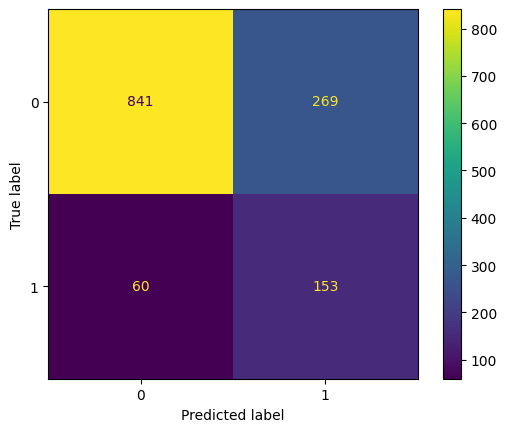

In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_logreg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [52]:
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.93      0.76      0.84      1110
           1       0.36      0.72      0.48       213

    accuracy                           0.75      1323
   macro avg       0.65      0.74      0.66      1323
weighted avg       0.84      0.75      0.78      1323



As the base accuracy is too low, gridsearch will not be used and Logistic Regression can be skipped, this is due to multicollinearity between variables that affect the accuracy.

### Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=1).fit(x_over,Y_over)
y_pred_tree = tree.predict(X_test)
print('Accuracy score: ', accuracy_score(y_test, y_pred_tree))

Accuracy score:  0.9720332577475435


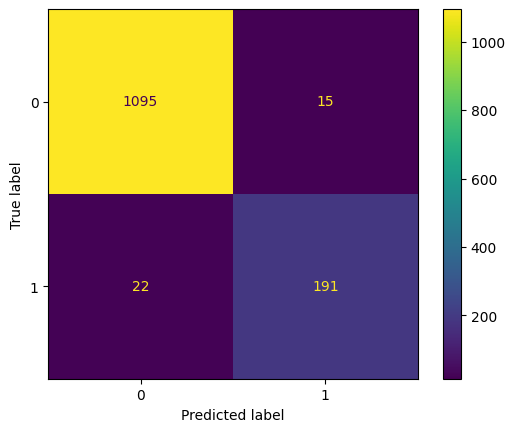

In [54]:
cm = confusion_matrix(y_test, y_pred_tree)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
param_grid = {
    'max_depth': [3 , 5 , 10],
    'min_samples_split': [5,10,15],
    'min_samples_leaf': [2,4,6],
    'criterion': ['gini', 'entropy']
}

# Initialize the decision tree classifier
clf = DecisionTreeClassifier(random_state=0)

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(x_over,Y_over)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the decision tree with the best parameters
best_clf = DecisionTreeClassifier(**best_params)
best_clf.fit(x_over,Y_over)

# Make predictions on the test set
y_pred1 = best_clf.predict(X_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred1)
print("Accuracy:", accuracy)

Accuracy: 0.8888888888888888


In [56]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      1110
           1       0.61      0.86      0.71       213

    accuracy                           0.89      1323
   macro avg       0.79      0.88      0.82      1323
weighted avg       0.91      0.89      0.90      1323



### Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(x_over,Y_over)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9863945578231292


In [58]:
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'n_estimators': [50, 100, 200],
             'max_depth': [3,5,10],
             'min_samples_split': [5,10,15],
             'min_samples_leaf': [1, 2, 4],
             'criterion': ['gini', 'entropy']
             }

# Assign a dictionary of scoring metrics to capture

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring='roc_auc', cv=5)
rf1.fit(x_over,Y_over)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [50, 100, 200]},
             scoring='roc_auc')

In [59]:
print(classification_report(y_test,rf1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1110
           1       0.95      0.88      0.91       213

    accuracy                           0.97      1323
   macro avg       0.96      0.94      0.95      1323
weighted avg       0.97      0.97      0.97      1323



### XGBoost

In [64]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier().fit(x_over, Y_over)
xgb_pred = xgb_model.predict(X_test)
accuracy_score_xgb = round(accuracy_score(y_test,xgb_pred)*100,0)
accuracy_score_xgb

98.0

In [65]:
from xgboost import XGBClassifier
param_grid = {
    'max_depth': [3, 5, 10],
     'min_child_weight': [0.5,1],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [50,100,200],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Create an XGBoost classifier
xgb_classifier = XGBClassifier(random_state=0)

# Perform grid search
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(x_over, Y_over)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.1, 0.01], 'max_depth': [3, 5, 10],
                         'min_child_weight': [0.5, 1],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 0.9]},
             scoring='roc_auc')

In [66]:
print(classification_report(y_test,grid_search.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1110
           1       0.98      0.94      0.96       213

    accuracy                           0.99      1323
   macro avg       0.98      0.97      0.98      1323
weighted avg       0.99      0.99      0.99      1323



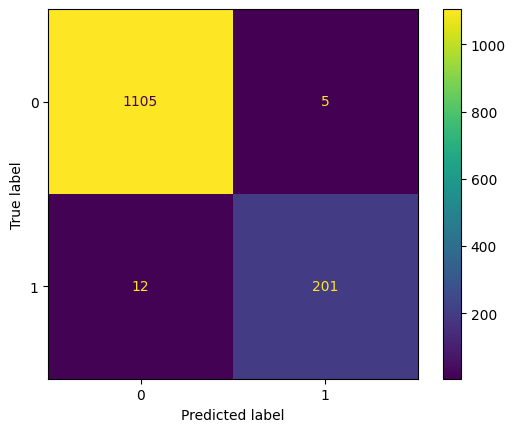

In [67]:
cm = confusion_matrix(y_test, grid_search.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## Feature Importance

As the decision tree, random forest model and XGBoost yield an ~90% + accuracy, it is decided to aggregate the feature importance with the following weights to get a more holistic idea of the influencing factors. This is due to the accuracy ranking of the models, with XGBoost having the highest accuracy, random forest second highest etc.

XGBoost 0.6

Random Forest 0.25

Decision Tree 0.15

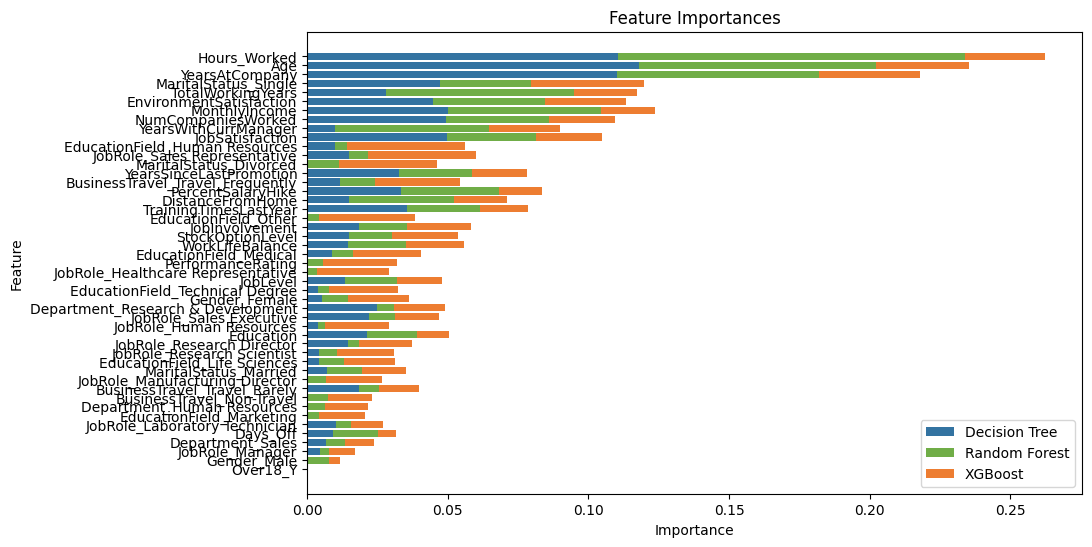

In [68]:
# Decision Tree Model
dt_feature_importances = best_clf.feature_importances_

# Random Forest model
rf_feature_importances = rf1.best_estimator_.feature_importances_

# XGBoost
xgb_feature_importances = grid_search.best_estimator_.feature_importances_

feature_names = x_over.columns
total_importance = dt_feature_importances * 0.15 + rf_feature_importances * 0.25 + xgb_feature_importances * 0.6

# DataFrame for feature importances
importance_df = pd.DataFrame(
    {
        "Feature": feature_names,
        "Decision Tree": dt_feature_importances,
        "Random Forest": rf_feature_importances,
        "XGBoost": xgb_feature_importances,
        "Total": total_importance,
    }
)

sorted_df = importance_df.sort_values("Total", ascending=True)
colors = ["#3373a1", "#70ad47", "#ed7d31"]

# Horizontal stacked bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as per your preference
plt.barh(
    sorted_df["Feature"],
    sorted_df["Decision Tree"],
    color=colors[0],
    label="Decision Tree",
)
plt.barh(
    sorted_df["Feature"],
    sorted_df["Random Forest"],
    color=colors[1],
    label="Random Forest",
    left=sorted_df["Decision Tree"],
)
plt.barh(
    sorted_df["Feature"],
    sorted_df["XGBoost"],
    color=colors[2],
    label="XGBoost",
    left=sorted_df["Decision Tree"] + sorted_df["Random Forest"],
)

plt.title("Feature Importances", fontsize=12)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.legend()

plt.show()

### Understanding Top 5 Factors of Feature Importance and how they affect Attrition

In [69]:
# Aggregate jobsatisfaction, environment satisfaction, worklifebalance

df1['Emp_Satisfaction_Score'] = df1['JobSatisfaction']/3 + df1['EnvironmentSatisfaction']/3 + df1['WorkLifeBalance']/3


In [70]:
# Aggregate performancerating, jobinvolvement

df1['Manaeger_Score'] = df1['PerformanceRating']/2 + df1['JobInvolvement']/2


### DEEP DIVE into Hours Worked vs Attrition

Overall, employees that work longer hours are more likely to leave the company. This maybe because of inadequate training or improper skill fit hiring, or unequal work distribution. This may lead to employee having to work longer hours to complete their work. Moreover, employees maybe encourage to work longer to get higher performance rating. This may lead to overwork and burnout.

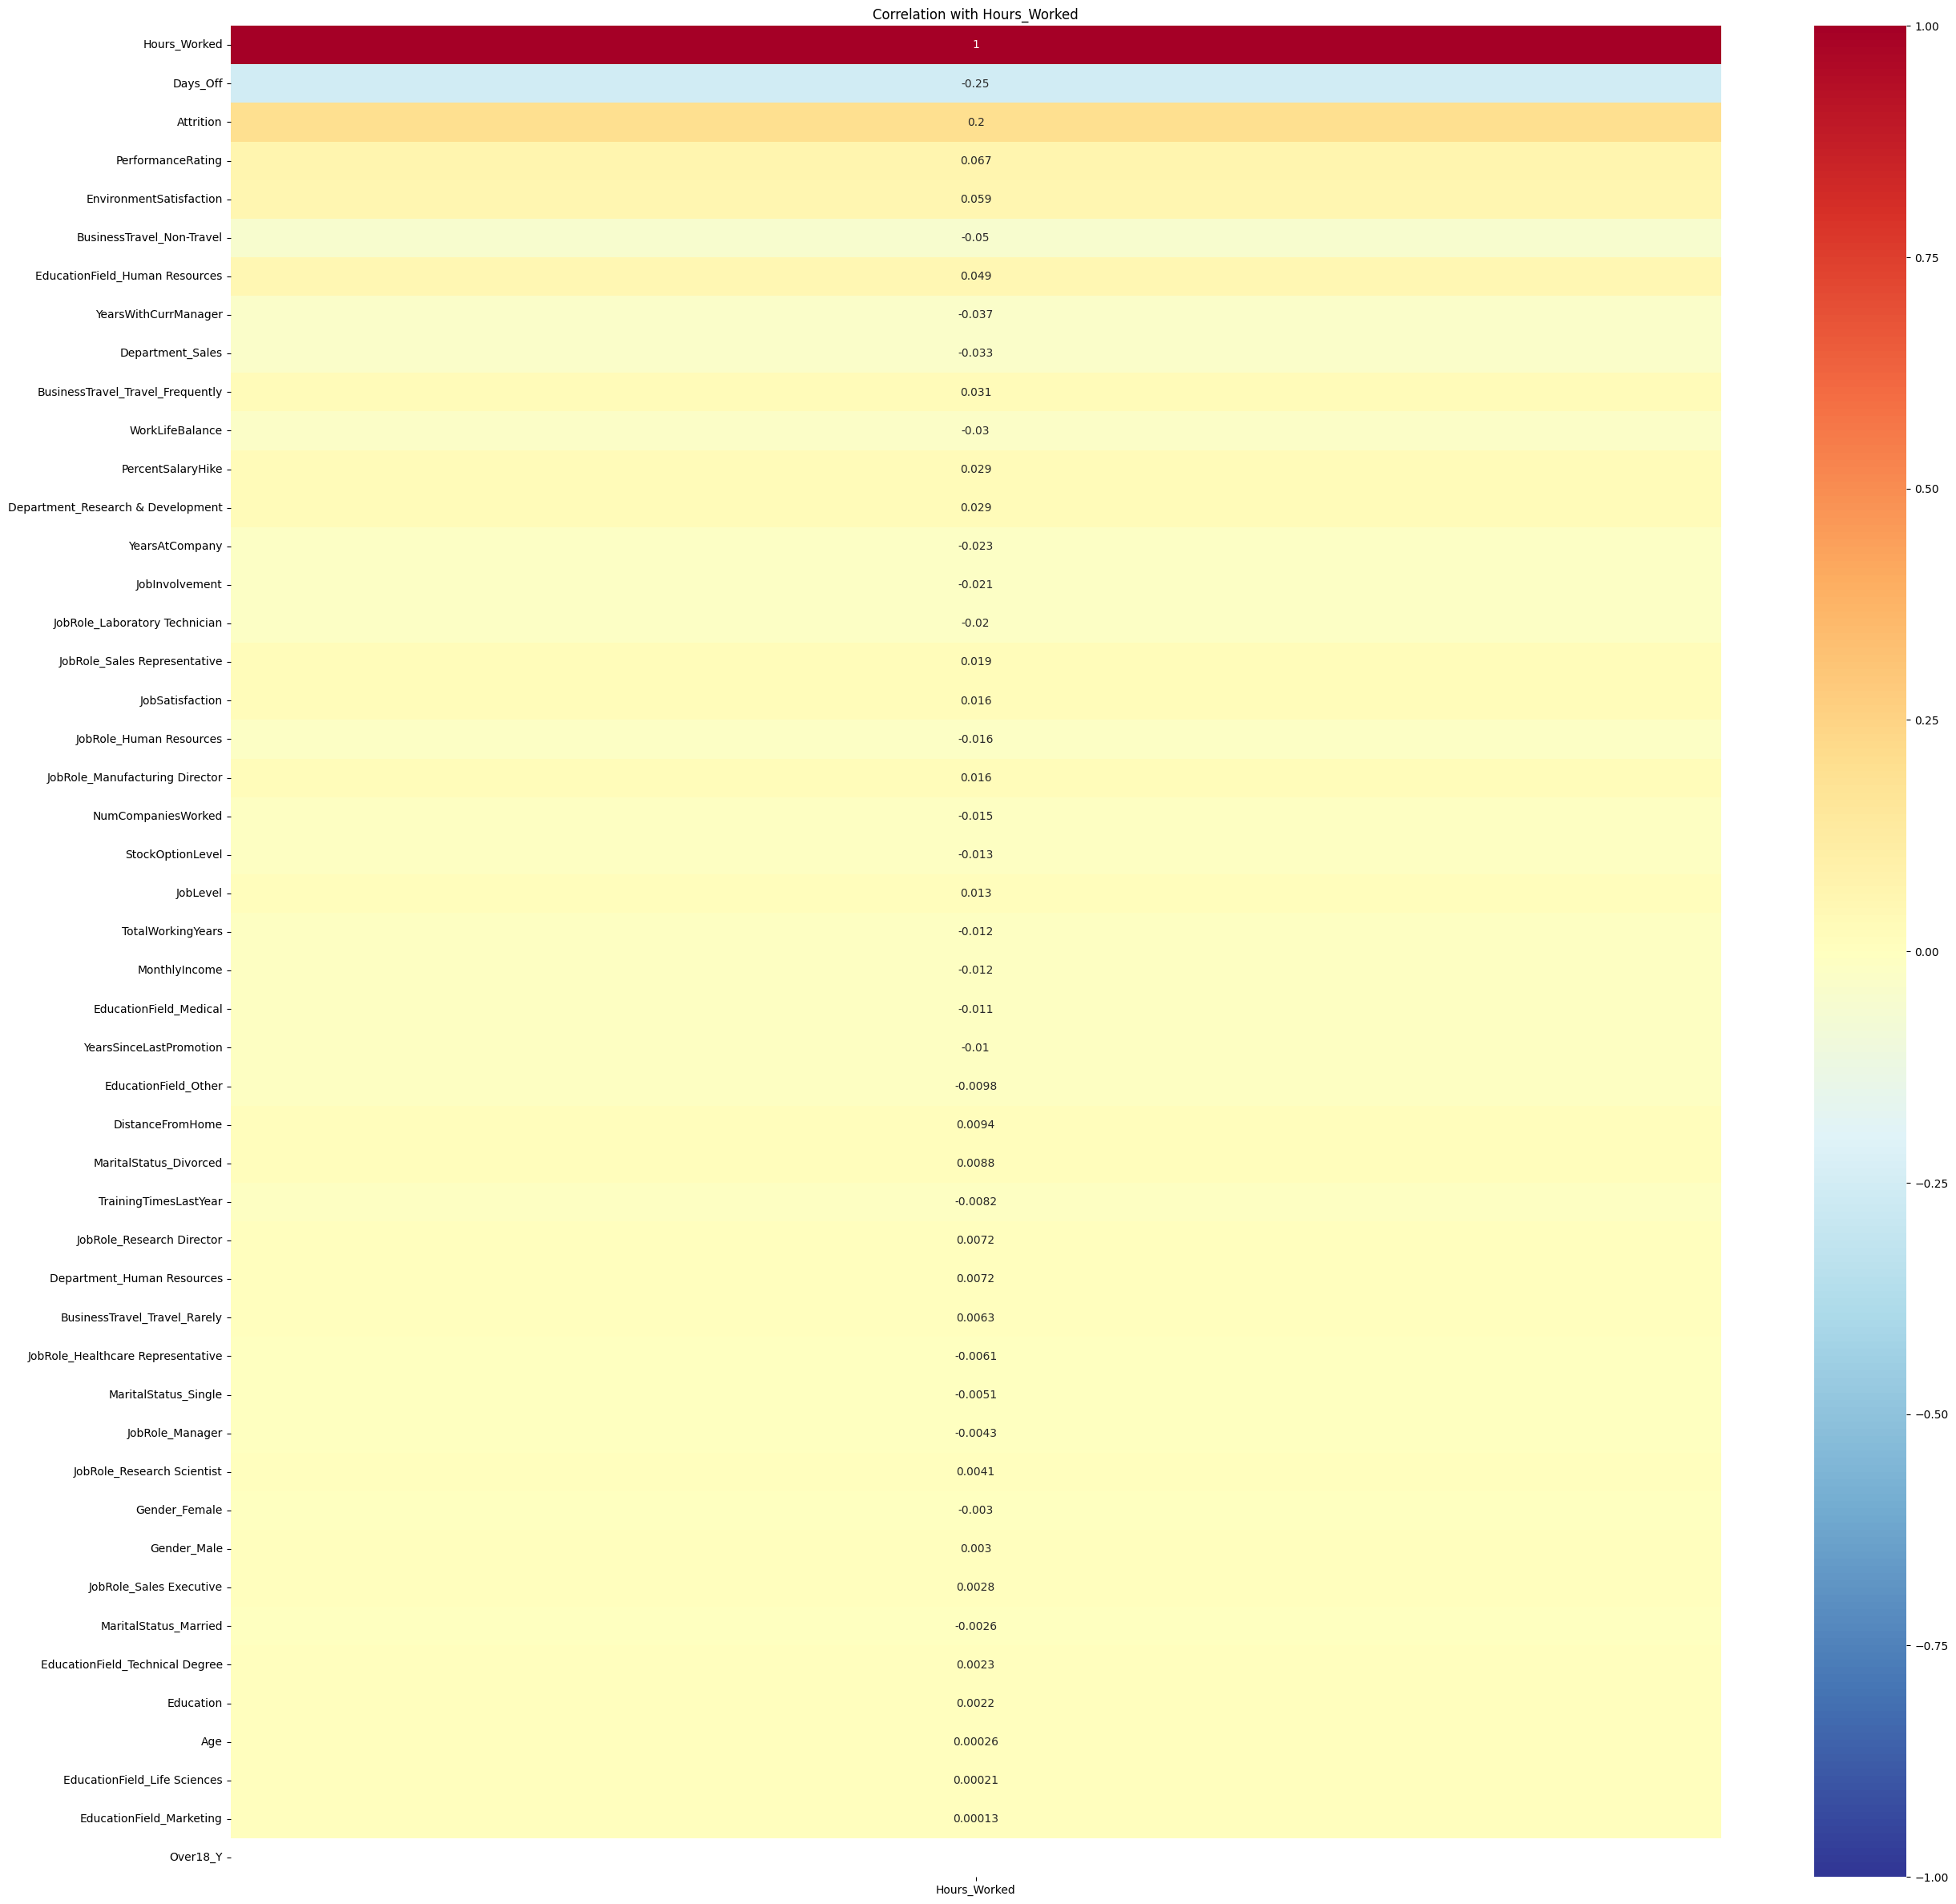

In [71]:
numeric_columns = df.select_dtypes(include=['number']).columns

# Create a correlation matrix for the numeric columns
correlation_matrix = df[numeric_columns].corr()
attrition_corr = correlation_matrix['Hours_Worked']

# Sort the correlation values in descending order
sorted_corr = attrition_corr.abs().sort_values(ascending=False)

# Create a heatmap of the sorted correlation values
plt.figure(figsize=(30, 30))
sns.heatmap(attrition_corr[sorted_corr.index].to_frame(), annot=True, cmap='RdYlBu_r', vmin=-1, vmax=1)
plt.title('Correlation with Hours_Worked')
plt.show()

We can see that there is not much correlation for Hours_Worked except for Attrition and Days_Off

<ipython-input-72-3b427bcc4c17>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y='Hours_Worked', data=df1, palette=colors1)
<ipython-input-72-3b427bcc4c17>:7: UserWarning: The palette list has more values (4410) than needed (2), which may not be intended.
  sns.boxplot(x='Attrition', y='Hours_Worked', data=df1, palette=colors1)


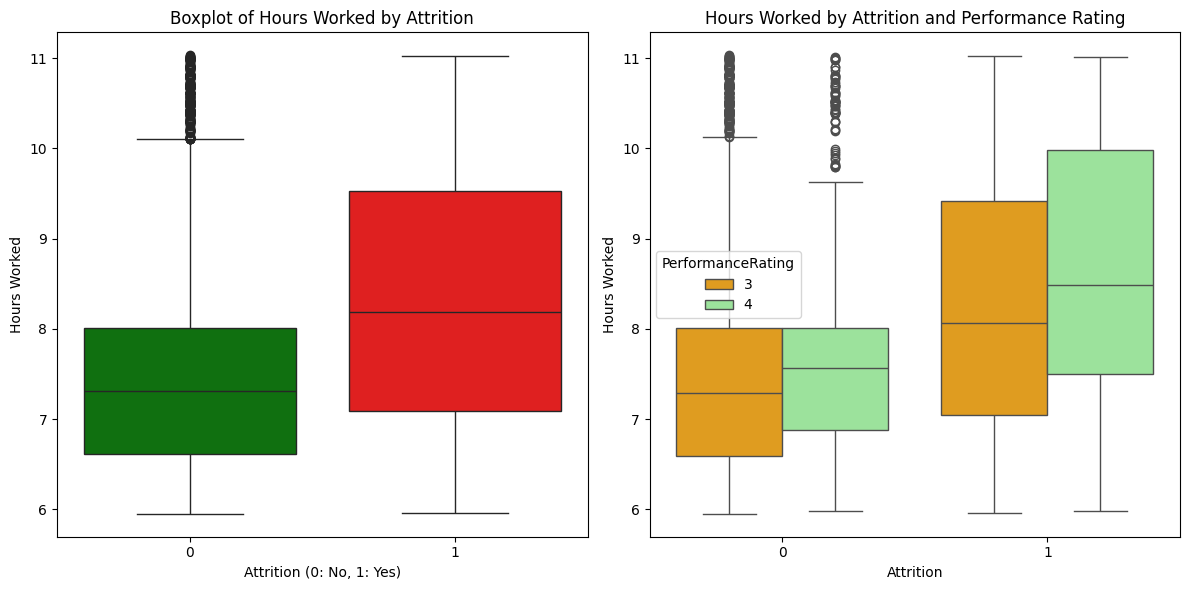

In [72]:
# Set the colors for the first boxplot
colors1 = ['green' if x == 0 else 'red' for x in df1['Attrition']]

# Create the first boxplot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Create the first subplot
sns.boxplot(x='Attrition', y='Hours_Worked', data=df1, palette=colors1)
plt.title('Boxplot of Hours Worked by Attrition', fontsize=12)
plt.xlabel('Attrition (0: No, 1: Yes)')
plt.ylabel('Hours Worked')

# Set the colors for the second boxplot
colors2 = {3: 'orange', 4: 'lightgreen'}

# Create the second boxplot
plt.subplot(1, 2, 2)  # Create the second subplot
sns.boxplot(data=df1, x='Attrition', y='Hours_Worked', hue='PerformanceRating', palette=colors2)
plt.title("Hours Worked by Attrition and Performance Rating")
plt.xlabel("Attrition")
plt.ylabel("Hours Worked")

# Adjust the layout and spacing
plt.tight_layout()

# Show the plot
plt.show()

We can see that the Number of Hours for employees that have stayed are around 1 hour less on average than employees who left.

This can mean that the telecommunications company may drive away employees because of overwork.

Employees who stay in the company work a similar amount of hours whether their performance review is higher or not. This is compared to the employees that have left, who work on average above 8 hours, reaching 9 or 10 in Q3.

<ipython-input-73-cd42aa109105>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Days_Off", y="Hours_Worked", data=df1, palette="Set2")


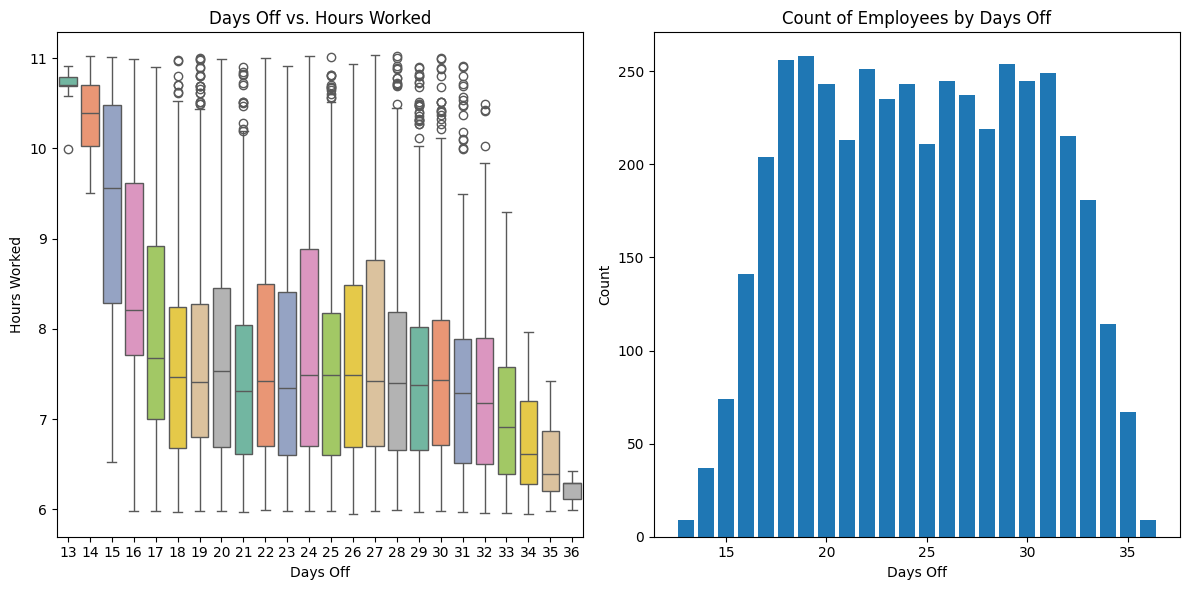

In [73]:
# Boxplot of DaysOff vs HoursWorked
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Create the first subplot
sns.boxplot(x="Days_Off", y="Hours_Worked", data=df1, palette="Set2")
plt.title("Days Off vs. Hours Worked")
plt.xlabel("Days Off")
plt.ylabel("Hours Worked")

# Bar chart for counting DaysOff
plt.subplot(1, 2, 2)  # Create the second subplot
days_off_counts = df1['Days_Off'].value_counts().sort_index(ascending=True)
plt.bar(days_off_counts.index, days_off_counts.values)
plt.xlabel('Days Off')
plt.ylabel('Count')
plt.title('Count of Employees by Days Off')

# Adjust the layout and spacing
plt.tight_layout()

# Show the plot
plt.show()

Whilst Hours_Worked has a strong correlation with days off, we can see that employees with less days off have higher working hours, possibly due to inability to finish existing work. However, the count for these values are low, therefore the findings are not as important.

<ipython-input-74-4d6d9ad9aed7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="WorkLifeBalance", y="Hours_Worked", data=df1, palette="Set2")


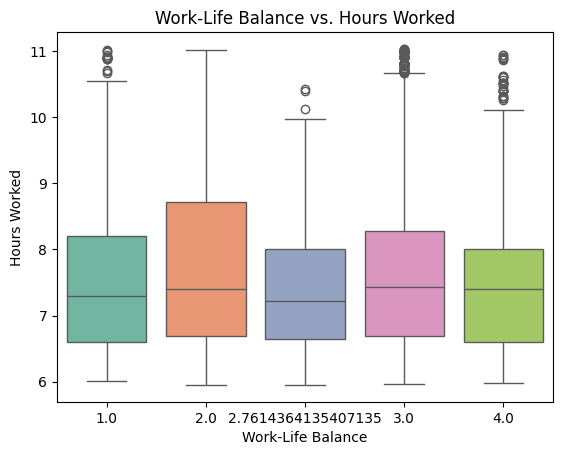

In [74]:
# Boxplot of WorkLifeBalance vs HoursWorked
sns.boxplot(x="WorkLifeBalance", y="Hours_Worked", data=df1, palette="Set2")

plt.title("Work-Life Balance vs. Hours Worked")
plt.xlabel("Work-Life Balance")
plt.ylabel("Hours Worked")
plt.show()


Surprisingly, despite the indication of a low work life balance, the hours worked are simiular whether the score is 1 or 4. This may be due to hours worked that are unreported.

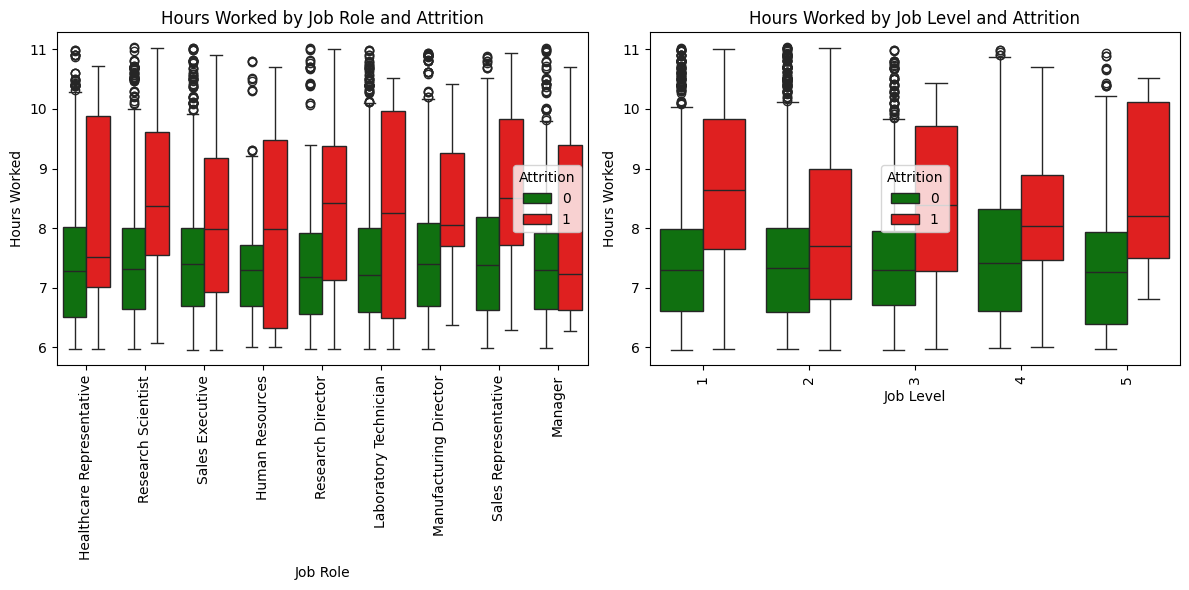

In [75]:
# Boxplot of JobRole vs HoursWorked, colored by Attrition
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Create the first subplot
sns.boxplot(x="JobRole", y="Hours_Worked", data=df1, hue="Attrition", palette={0: "green", 1: "red"})
plt.title("Hours Worked by Job Role and Attrition")
plt.xlabel("Job Role")
plt.ylabel("Hours Worked")
plt.xticks(rotation=90)

# Boxplot of JobLevel vs HoursWorked, colored by Attrition
plt.subplot(1, 2, 2)  # Create the second subplot
sns.boxplot(x="JobLevel", y="Hours_Worked", data=df1, hue="Attrition", palette={0: "green", 1: "red"})
plt.title("Hours Worked by Job Level and Attrition")
plt.xlabel("Job Level")
plt.ylabel("Hours Worked")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

We can see that employees that have left the company work on average more hours than their counterparts that stay in the company, this could be due to a number of reasons: non-standardized training, inadequate skills fit, unequal workplace distribution of work.

This is particularly seen in job levels 1,3 and 5. Job level 1 is the most severely affected, and this could indicate entry-level employees struggling to adapt to the workplace environment, which may point to inadequate skills fit hires, training issues or competition to get a higher performance rating (though ruled out due to the hoursworked vs attrition chart)

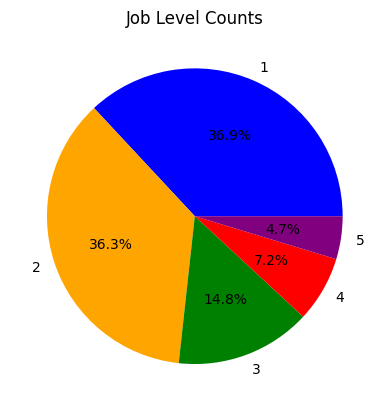

In [76]:
# Job level counts
job_level_counts = df1['JobLevel'].value_counts()
colors = ['blue', 'orange', 'green', 'red','purple']
plt.pie(job_level_counts, labels=job_level_counts.index, autopct='%1.1f%%', colors=colors)

plt.title('Job Level Counts')
plt.show()


In [77]:
# Calculate the attrition rate for each job level
attrition_rate_by_job_level = (
    df1.groupby('JobLevel')['Attrition'].mean() * 100
)

print(attrition_rate_by_job_level)


JobLevel
1    15.469613
2    17.790262
3    14.678899
4    16.037736
5    13.043478
Name: Attrition, dtype: float64


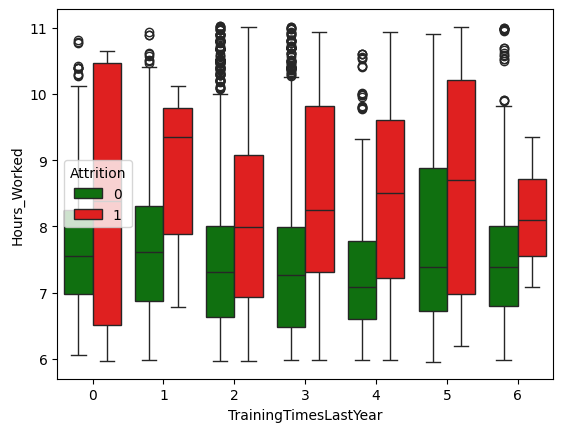

In [78]:
# Boxplot hours worked grouped by integer vs training times
sns.boxplot(x='TrainingTimesLastYear', y='Hours_Worked', data=df1, hue = 'Attrition',palette={1: "red", 0: "green"})
plt.show()


It appears that training does not significantly decrease the number of hours employees working hours, this is especially apparent in >1 training times, suggesting that stronger training is needed.

In [79]:
# Attrition rate for marital status
attrition_rate_by_marital_status = (
    df1.groupby('MaritalStatus')['Attrition'].mean() * 100
)
print(attrition_rate_by_marital_status)


MaritalStatus
Divorced    10.091743
Married     12.481426
Single      25.531915
Name: Attrition, dtype: float64


We can see that job levels 1 and 2 make the majority of the company, but all job levels have similar attrition rates.

### DEEP DIVE into Age vs Attrition

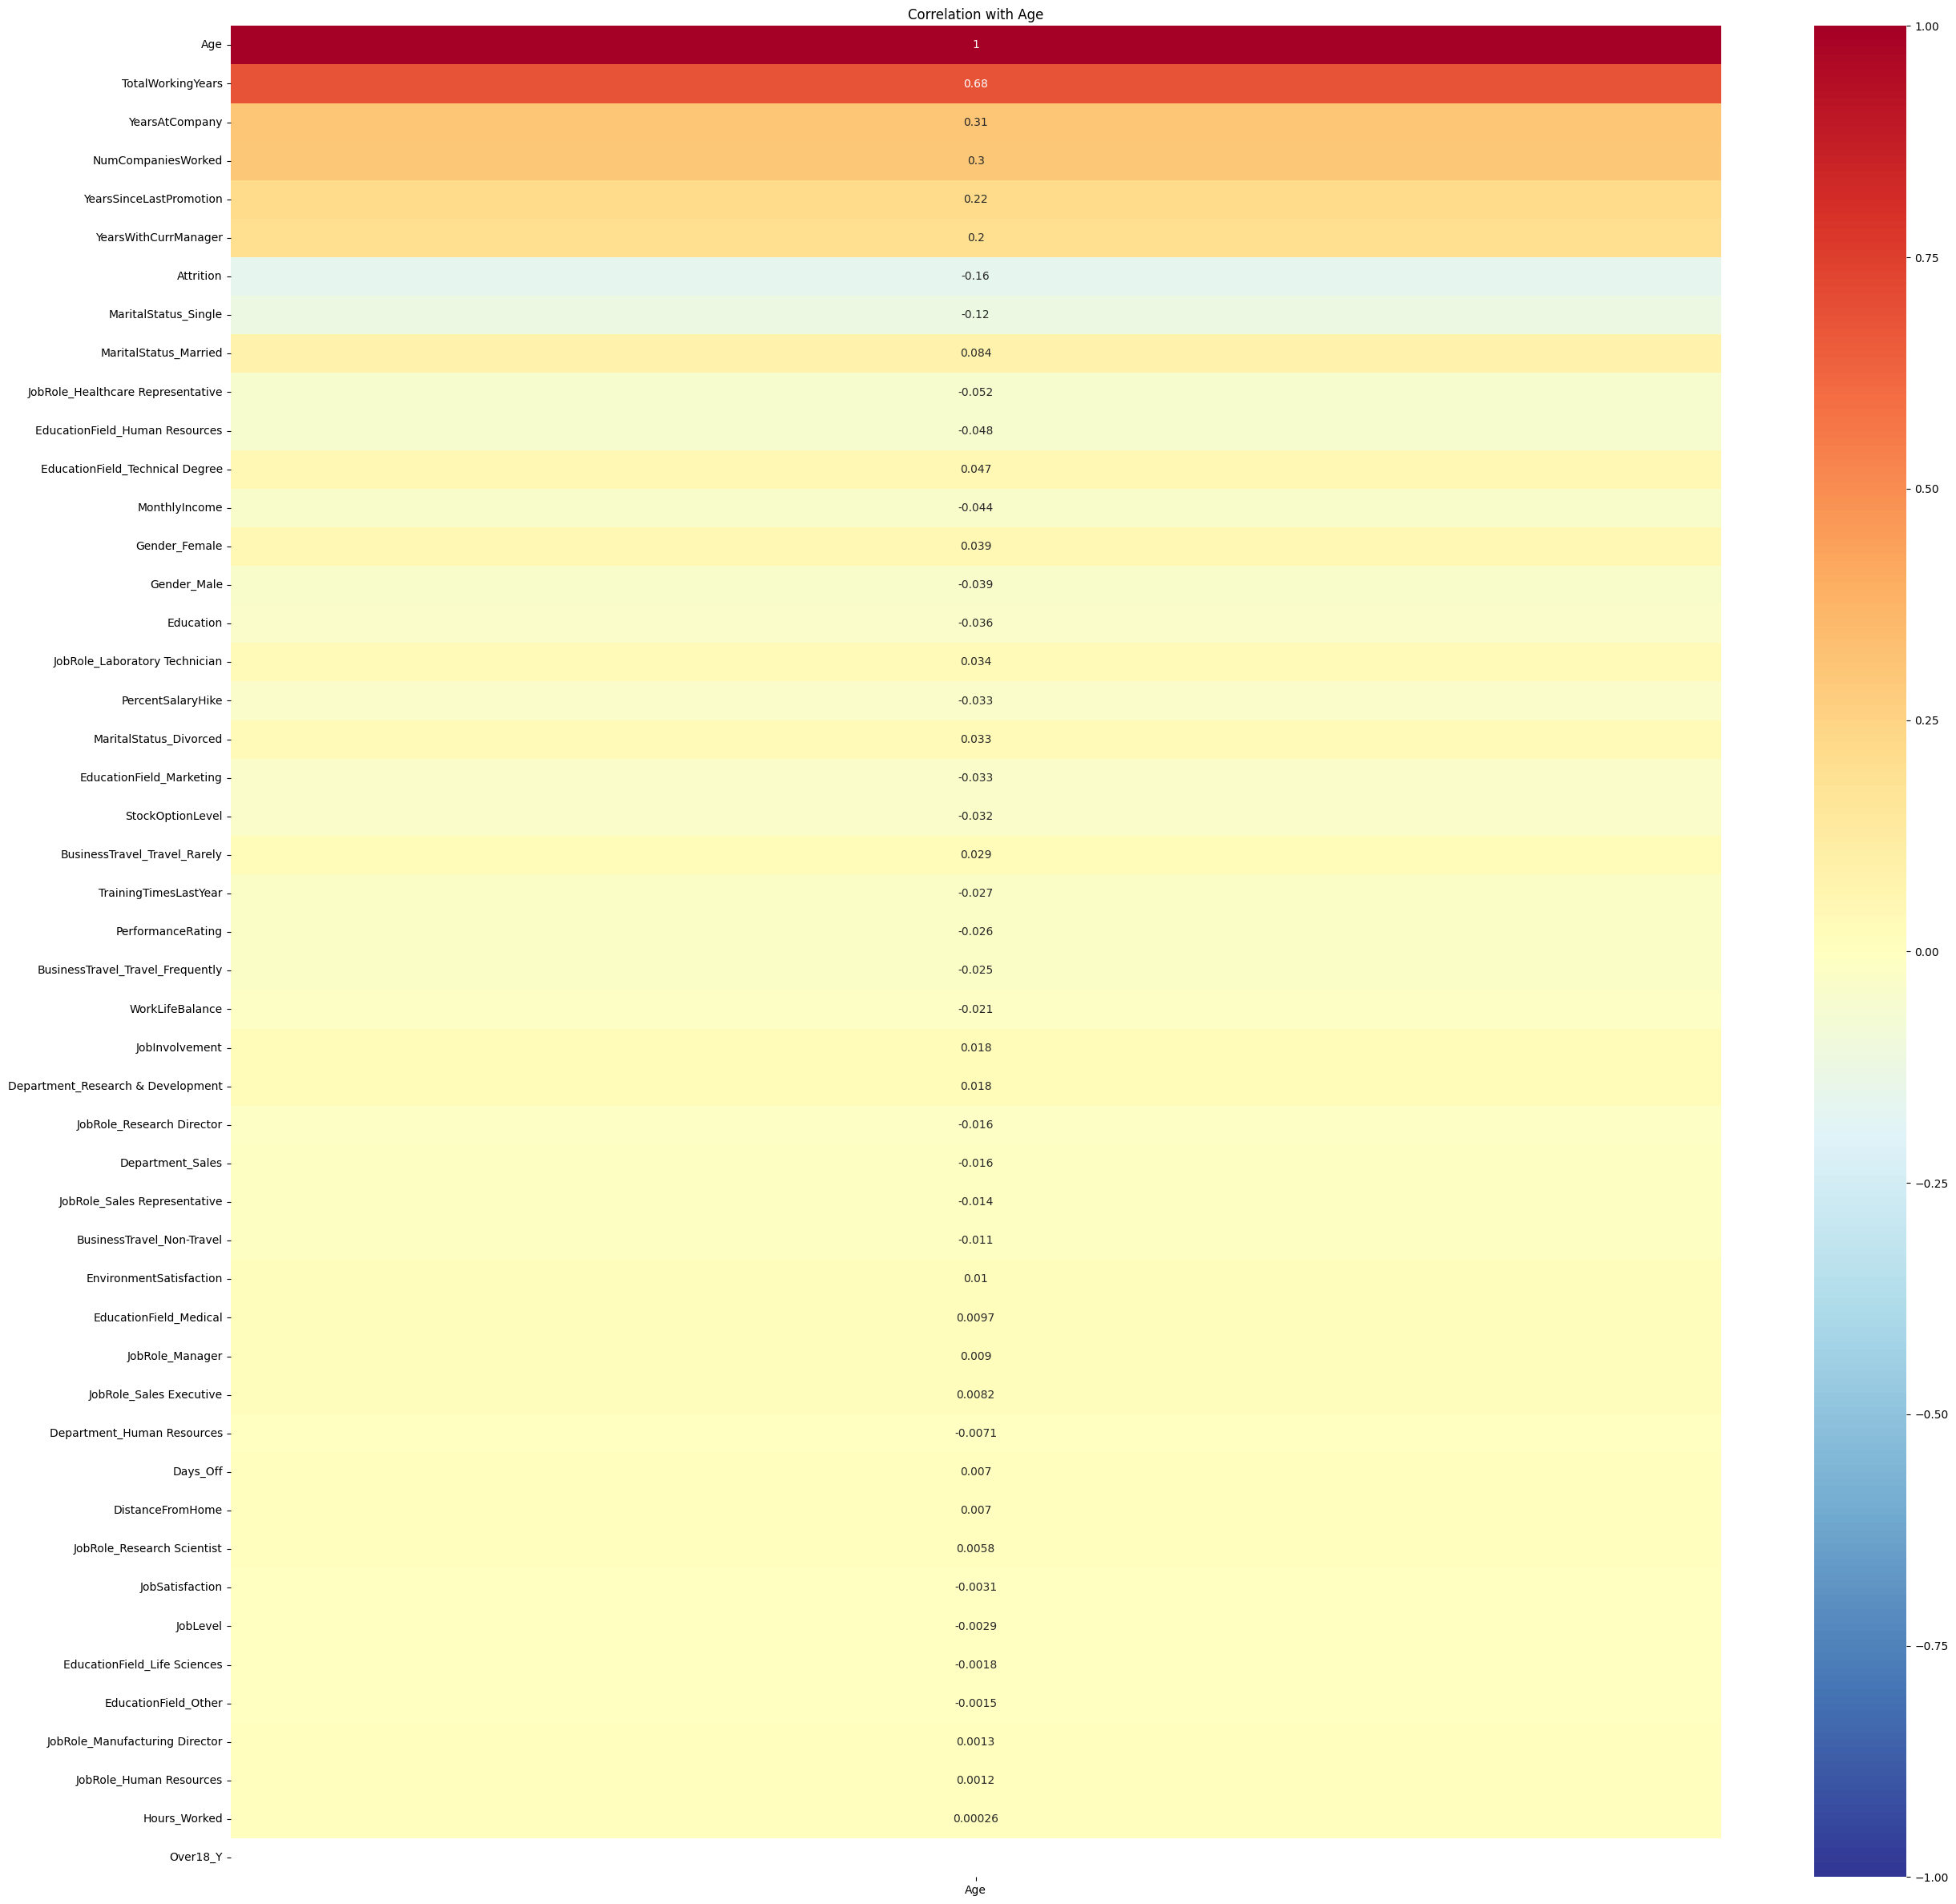

In [80]:
# Correlation Heatmap to identify age correlations
correlation_matrix = df[numeric_columns].corr()
attrition_corr = correlation_matrix['Age']

# Sort the correlation values in descending order
sorted_corr = attrition_corr.abs().sort_values(ascending=False)

# Create a heatmap of the sorted correlation values
plt.figure(figsize=(30, 30))
sns.heatmap(attrition_corr[sorted_corr.index].to_frame(), annot=True, cmap='RdYlBu_r', vmin=-1, vmax=1)
plt.title('Correlation with Age')
plt.show()

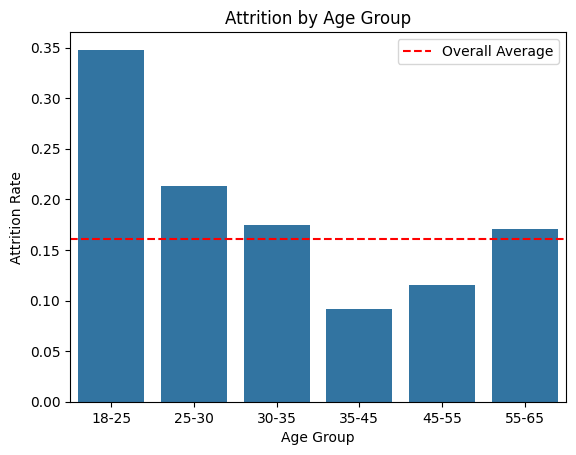

In [81]:
df1['Age_Group'] = pd.cut(df1['Age'], bins=[18, 25, 30, 35, 45, 55, 65], labels=['18-25', '25-30', '30-35', '35-45', '45-55', '55-65'])

# Group by age group and calculate the mean of Attrition
attrition_by_age_group = df1.groupby('Age_Group')['Attrition'].mean()

# Calculate the overall average attrition rate
overall_avg_attrition = df1['Attrition'].mean()

# Bar Chart
sns.barplot(x=attrition_by_age_group.index, y=attrition_by_age_group.values)
plt.axhline(y=overall_avg_attrition, linestyle='--', color='red', label='Overall Average')
plt.title('Attrition by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Attrition Rate')
plt.legend()

The data shows that younger age groups are more likely to leave the company, especially the youngest age groups such 18-25 have an attrition rate of around 34%, whilst 25-35 have an above average attrition rate of 19%. This is possible due to a lack of career growth opportunities or skill development opportunities.

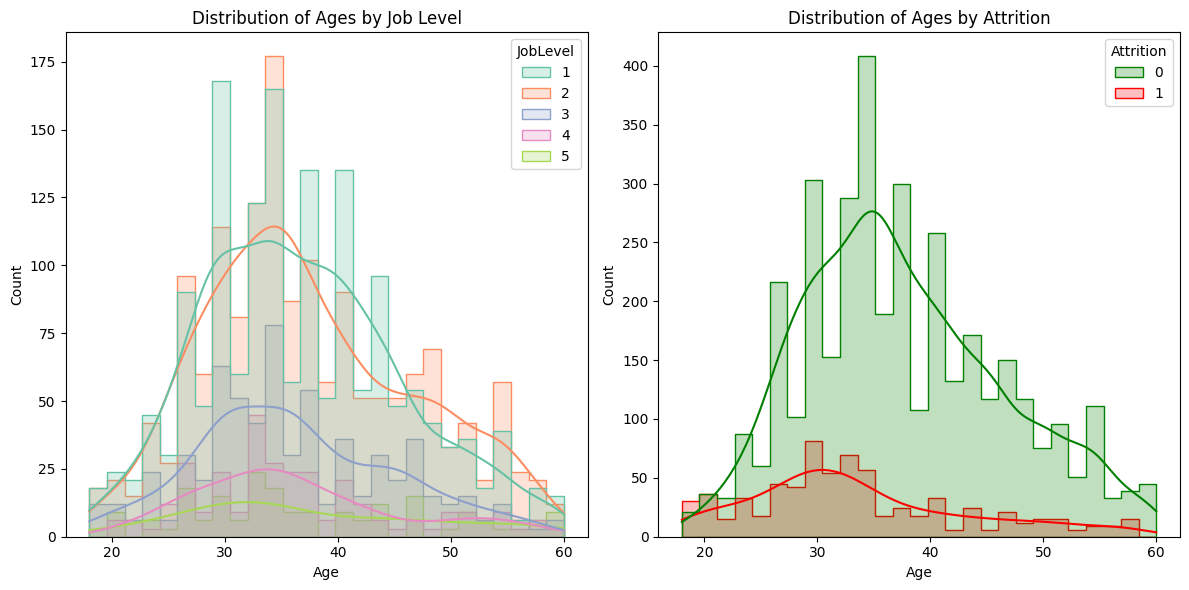

In [82]:
# Age distribution for job levels
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Distribution of ages for each job level
sns.histplot(data=df1, x="Age", hue="JobLevel", palette="Set2", kde=True, element="step", ax=axes[0])
axes[0].set_title("Distribution of Ages by Job Level")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Count")

# Distribution of ages for each job level, colored by attrition
sns.histplot(data=df1, x="Age", hue="Attrition", palette={0: "green", 1: "red"}, kde=True, element="step", ax=axes[1])
axes[1].set_title("Distribution of Ages by Attrition")
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


The highest count of attrition can be seen for younger age groups,

In [83]:
# Pivottable distribution of performance review of different age groups

df1.pivot_table(values='PerformanceRating', index='Age_Group', aggfunc=('count', 'mean'))


count      mean
Age_Group                 
18-25        345  3.173913
25-30        789  3.163498
30-35       1029  3.172012
35-45       1404  3.123932
45-55        678  3.159292
55-65        141  3.170213

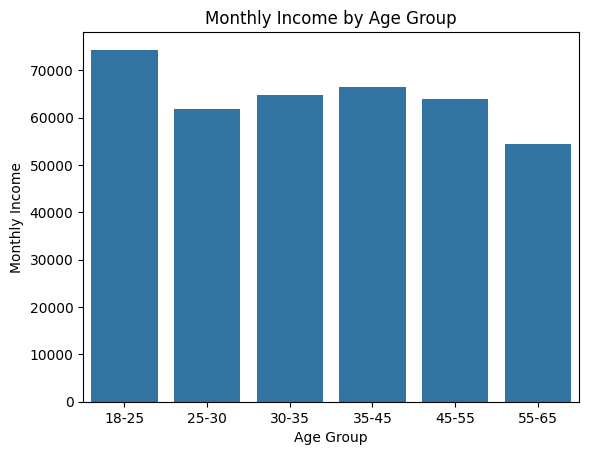

In [84]:
# Monthly income for different age
monthly_income_by_age_group = df1.groupby('Age_Group')['MonthlyIncome'].mean()

sns.barplot(x=monthly_income_by_age_group.index, y=monthly_income_by_age_group.values)
plt.title('Monthly Income by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Monthly Income')
plt.show()


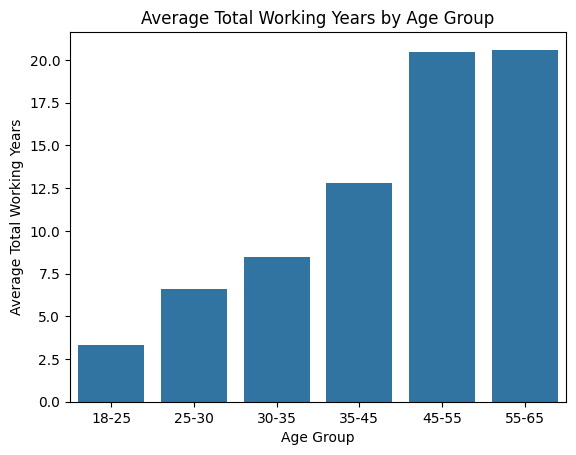

In [85]:
# Age vs totalworkingyears
df1['Age_Group'] = pd.cut(df1['Age'], bins=[18, 25, 30, 35, 45, 55, 65], labels=['18-25', '25-30', '30-35', '35-45', '45-55', '55-65'])

# Calculate the average TotalWorkingYears for each age group
avg_total_working_years_by_age_group = df1.groupby('Age_Group')['TotalWorkingYears'].mean()

sns.barplot(x=avg_total_working_years_by_age_group.index, y=avg_total_working_years_by_age_group.values)
plt.title('Average Total Working Years by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Total Working Years')
plt.show()


It appears that TotalWorkingYears correlates strongly with Age, therefore not many insights can be found.

In [86]:
# Jobrole human resources attrition rates

attrition_rate_by_job_role = (
    df1.groupby('JobRole')['Attrition'].mean() * 100
)

print(attrition_rate_by_job_role)


JobRole
Healthcare Representative    14.503817
Human Resources              13.461538
Laboratory Technician        16.216216
Manager                      13.725490
Manufacturing Director       11.034483
Research Director            23.750000
Research Scientist           18.150685
Sales Executive              16.871166
Sales Representative         14.457831
Name: Attrition, dtype: float64


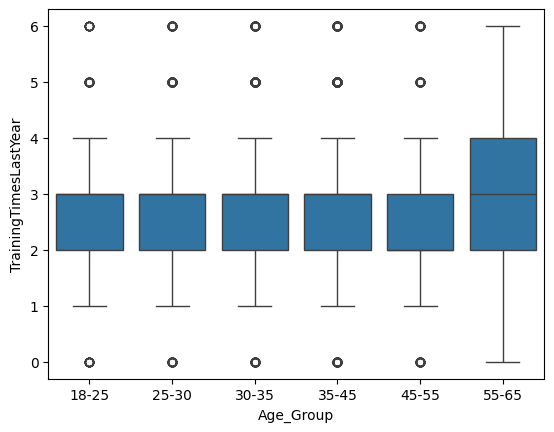

In [87]:
# Age vs trainingtimes
sns.boxplot(x='Age_Group', y='TrainingTimesLastYear', data=df1)
plt.show()


### DEEP DIVE into Human Resources vs Attrition

                  Attrition
EducationField             
Human Resources    0.407407
Life Sciences      0.166667
Marketing          0.157233
Medical            0.161638
Other              0.121951
Technical Degree   0.113636


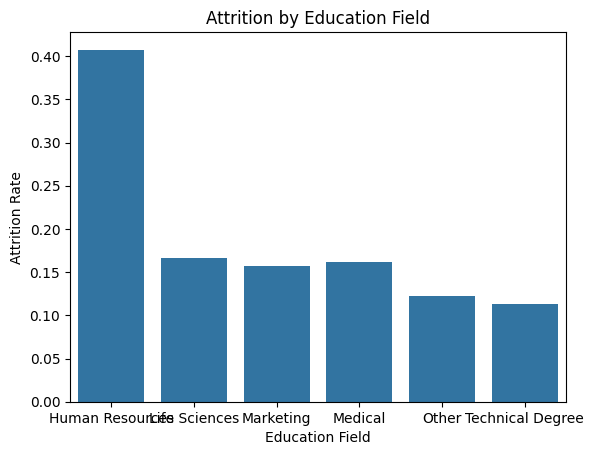

In [88]:
# Education type and attrition
pivot_table = pd.pivot_table(df1, index='EducationField', values='Attrition', aggfunc='mean')
print(pivot_table)
sns.barplot(x=pivot_table.index, y='Attrition', data=pivot_table)
plt.title('Attrition by Education Field')
plt.xlabel('Education Field')
plt.ylabel('Attrition Rate')
plt.show()


In [89]:
# Attrition rate for different departments, HR has highest attrition
attrition_rate_by_department = df1.groupby('Department')['Attrition'].mean()
print(attrition_rate_by_department)

Department
Human Resources           0.301587
Research & Development    0.157128
Sales                     0.150224
Name: Attrition, dtype: float64


It appears that education human resources is related to the department that employees work in, and t here is a high turnover in the human resources department.

In [90]:
# Employee satisfaction and manager score for departments
avg_satisfaction_by_department = df1.groupby('Department')['Emp_Satisfaction_Score'].mean()
avg_manager_score_by_department = df1.groupby('Department')['Manaeger_Score'].mean()

results_df = pd.DataFrame({
    'Department': avg_satisfaction_by_department.index,
    'Average Employee Satisfaction': avg_satisfaction_by_department.values,
    'Average Manager Score': avg_manager_score_by_department.values,
})
print(results_df.to_string())


               Department  Average Employee Satisfaction  Average Manager Score
0         Human Resources                       2.745611               2.944444
1  Research & Development                       2.726182               2.943288
2                   Sales                       2.761605               2.938341


However, employee satisfaction and manager scoring is relatively similar for all departments.

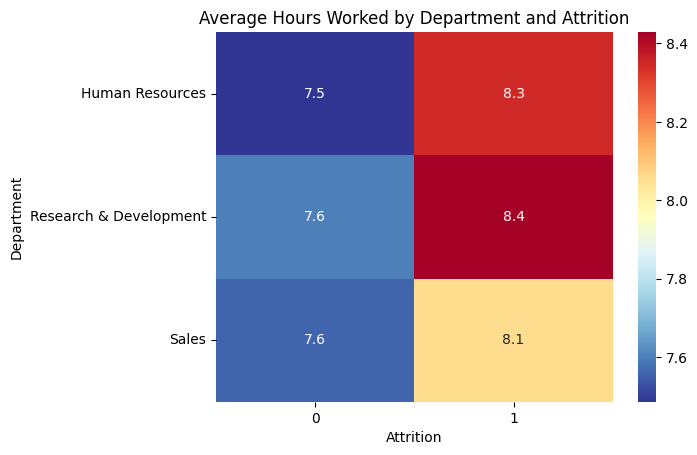

In [91]:
# Hoursworked for different departments and attrition
avg_hours_worked_by_department_and_attrition = df1.groupby(['Department', 'Attrition'])['Hours_Worked'].mean().unstack()
sns.heatmap(avg_hours_worked_by_department_and_attrition, annot=True, cmap='RdYlBu_r', vmin=avg_hours_worked_by_department_and_attrition.min().min(), vmax=avg_hours_worked_by_department_and_attrition.max().max())
plt.title('Average Hours Worked by Department and Attrition')
plt.xlabel('Attrition')
plt.ylabel('Department')
plt.show()


However, they are not working more hours than the other departments.

In [92]:
# Monthlyincomelevel of departments

monthlyincomelevel_by_department = df1.groupby('Department')['MonthlyIncome'].mean()
print(monthlyincomelevel_by_department)


Department
Human Resources           57904.444444
Research & Development    67187.960458
Sales                     61384.484305
Name: MonthlyIncome, dtype: float64


It must be noted that the human resources department on average earns lower than the other departments.

Department  Human Resources  Research & Development     Sales
Age_Group                                                    
18-25              0.714286                0.342105  0.281250
25-30              0.363636                0.195266  0.228916
30-35              0.214286                0.197248  0.126126
35-45              0.190476                0.081967  0.098592
45-55              0.250000                0.116129  0.095238
55-65              0.500000                0.062500  0.384615


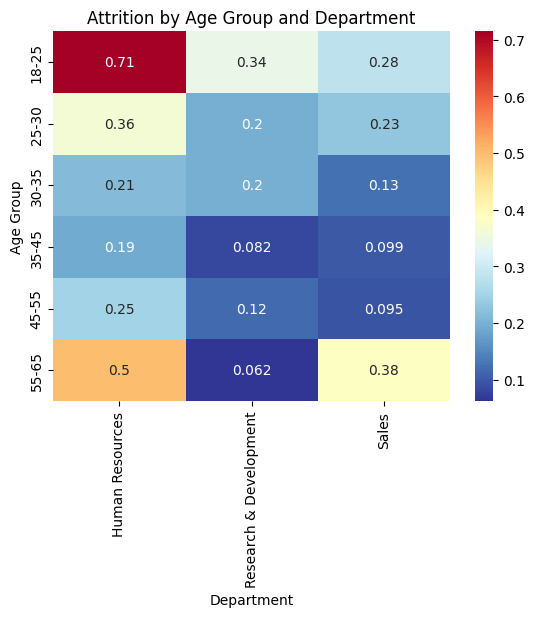

In [93]:
# Pivot table age and departments
pivot_table = pd.pivot_table(df1, index='Age_Group', columns='Department', values='Attrition', aggfunc='mean')
print(pivot_table)

# Heatmap to visualize the relationship between age and department
sns.heatmap(pivot_table, annot=True, cmap='RdYlBu_r', vmin=pivot_table.min().min(), vmax=pivot_table.max().max())

plt.title('Attrition by Age Group and Department')
plt.xlabel('Department')
plt.ylabel('Age Group')
plt.show()


It appears that HR department hs higher attrition over all working age groups compared to other departments. This is a source for further investigation into the workplace culture, career progression, or income.

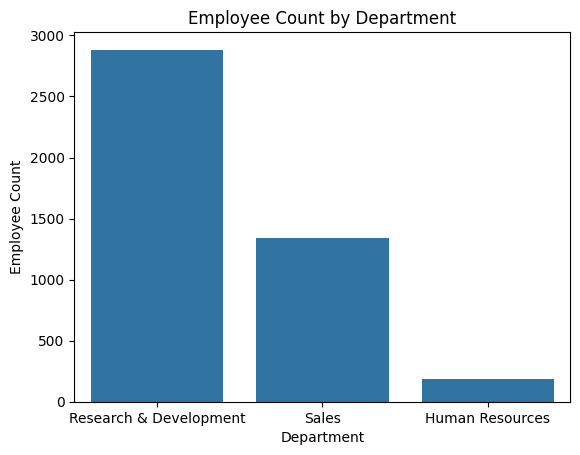

In [95]:
# Employee count in different departments
department_counts = df1['Department'].value_counts()
sns.barplot(x=department_counts.index, y=department_counts.values)
plt.title('Employee Count by Department')
plt.xlabel('Department')
plt.ylabel('Employee Count')
plt.show()


However, it must be noted that HR is a relatively smaller department compared to the others, therefore there may not be enough data to prove that this department has high consistent attrition.

### DEEP DIVE into Marital Status vs  Attrition

In [97]:
# Attrition rates for different marital status

attrition_rate_by_marital_status = (
    df1.groupby('MaritalStatus')['Attrition'].mean() * 100
)

print(attrition_rate_by_marital_status)


MaritalStatus
Divorced    10.091743
Married     12.481426
Single      25.531915
Name: Attrition, dtype: float64


In [98]:
# Working hours for different marital status
pivot_table = pd.pivot_table(df1, values='Hours_Worked', index='MaritalStatus')
print(pivot_table)


               Hours_Worked
MaritalStatus              
Divorced           7.722833
Married            7.697054
Single             7.690805


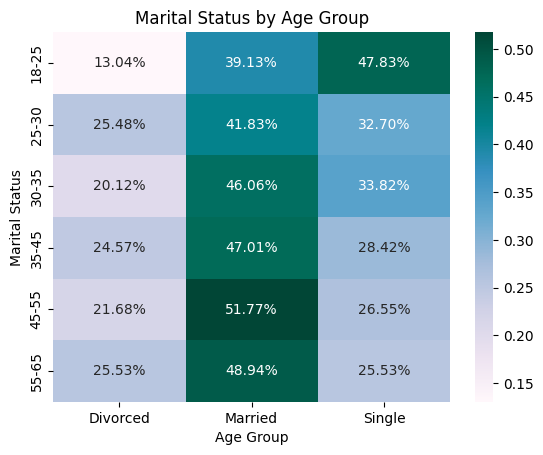

In [99]:
# Agegroup vs marital status
# Crosstab of Age_Group and MaritalStatus
age_group_marital_status = pd.crosstab(df1['Age_Group'], df1['MaritalStatus'])

# Calculate the percentage of each marital status within each age group
age_group_marital_status_pct = age_group_marital_status.div(age_group_marital_status.sum(axis=1), axis=0)

# Heatmap
sns.heatmap(age_group_marital_status_pct, cmap='PuBuGn', annot=True, fmt='.2%')
plt.title('Marital Status by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Marital Status')
plt.show()


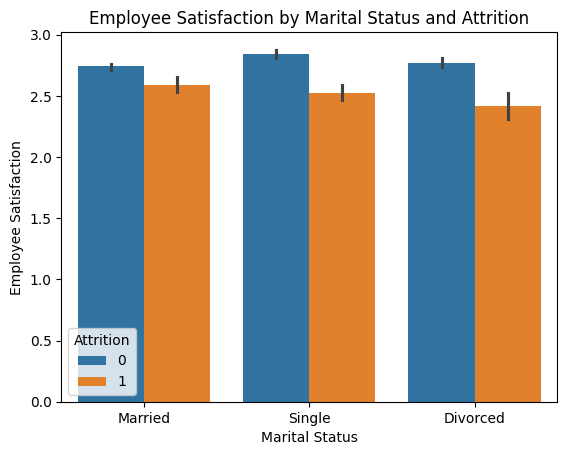

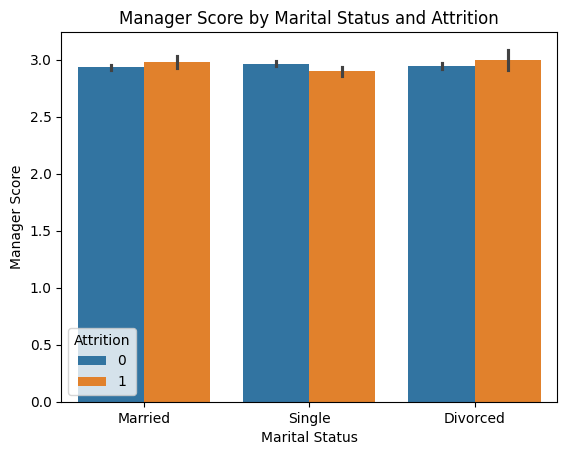

In [111]:
# Marital status and employee satisfaction and managerscore by attrition
sns.barplot(x='MaritalStatus', y='Emp_Satisfaction_Score', data=df1, hue='Attrition')
plt.title('Employee Satisfaction by Marital Status and Attrition')
plt.xlabel('Marital Status')
plt.ylabel('Employee Satisfaction')
plt.show()

sns.barplot(x='MaritalStatus', y='Manaeger_Score', data=df1, hue='Attrition')
plt.title('Manager Score by Marital Status and Attrition')
plt.xlabel('Marital Status')
plt.ylabel('Manager Score')
plt.show()


More data needs to be gathered to identify the priorities and needs of younger and single employees, for the company to develop methods to address this.

### DEEP DIVE into Monthly Income vs attrition

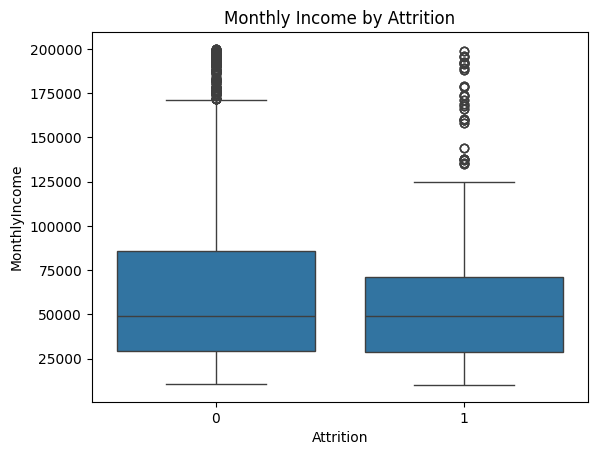

In [109]:
# Boxplot monthly income and attrition
sns.boxplot(x="Attrition", y="MonthlyIncome", data=df1)
plt.title("Monthly Income by Attrition")
plt.show()


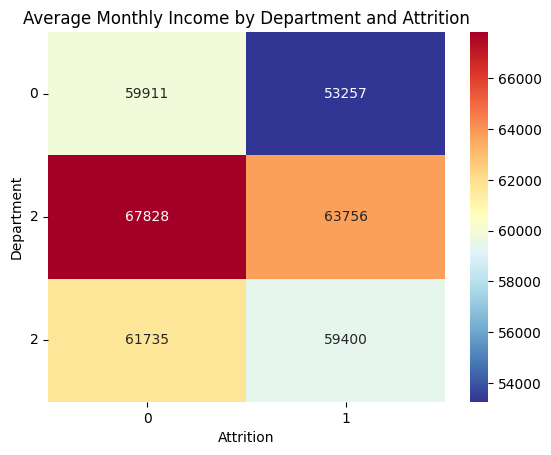

In [106]:

# Average monthly income for each department and attrition group
avg_monthly_income_by_department_and_attrition = df1.groupby(['Department', 'Attrition'])['MonthlyIncome'].mean().unstack()

# Heatmap to visualize the data
ax = sns.heatmap(avg_monthly_income_by_department_and_attrition, annot=True, cmap='RdYlBu_r',
                 vmin=avg_monthly_income_by_department_and_attrition.min().min(),
                 vmax=avg_monthly_income_by_department_and_attrition.max().max(),
                 fmt=".0f")  # Specify format as a full number

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'))

plt.title('Average Monthly Income by Department and Attrition')
plt.xlabel('Attrition')
plt.ylabel('Department')
plt.show()

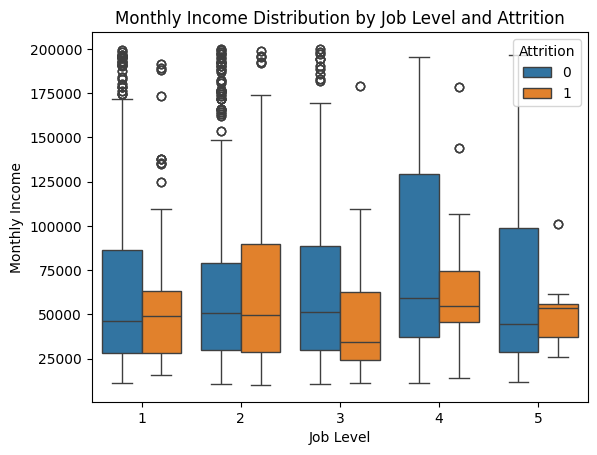

In [118]:
# Boxplot monthly income distribution of job levels with attrition
sns.boxplot(x="JobLevel", y="MonthlyIncome", data=df1, hue="Attrition")
plt.title("Monthly Income Distribution by Job Level and Attrition")
plt.xlabel("Job Level")
plt.ylabel("Monthly Income")
plt.show()


An income disparity can be seen for job levels 1,3,4,5 where those who have left the company despite being in the same job level receive a lower interquartile range of monthly income. However, this may be due to employeees choosing to stay longer and earning promotions over time.

## Conclusions

Objective 1:
Model the probability of attrition amongst employees

- XGBoost shows the highest macro scores for precision, recall and f-1 at 97-98%, this is followed by random forest (94-96%), decision tree (78-87%) and Logistic Regression (65-73%)

- The XGBoost model has 6 false positives and 13 false negatives in the test size of 30%, outperforming the other models.

In [101]:
# Model macro scores for all models tested
data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'Precision': [0.65, 0.78, 0.96, 0.98],
    'Recall': [0.73, 0.87, 0.94, 0.97],
    'F-1': [0.66, 0.81, 0.95, 0.97]
}

df = pd.DataFrame(data)
df_sorted = df.sort_values(by='Precision', ascending=False)
df_sorted.reset_index(drop=True, inplace=True)
print(df_sorted)

                 Model  Precision  Recall   F-1
0              XGBoost       0.98    0.97  0.97
1        Random Forest       0.96    0.94  0.95
2        Decision Tree       0.78    0.87  0.81
3  Logistic Regression       0.65    0.73  0.66


Objective 2:
Develop strategies to reduce the current attrition rate.

- By aggregating the decision tree, random forest, and XGBoost model's infleuncing factors at a weight of 0.15, 0.25, and 0.6, a more holistic view of what affects an employee's decision to leave the company can be made.

These factors are:
1. **Hours Worked** - Overall, employees that work longer hours are more likely to leave the company. This may be because of inadequate training or improper skill fit hiring, or unequal work distribution. This may lead to employee having to work longer hours to complete their work. Moreover, employees may be encouraged to work longer to get higher performance rating. This may lead to overwork and burnout.

- Set policies to address overwork amongst employees and encourage employees to finish work within working hours (below 8). In the case that the workload exceeds working hours, managers must identify areas of work thta can be further automated or hire additional staff.
- Moreover, managers should also ensure equal work distribution and proper remuneration for the extended hours (see point 5).
- Training plans need to be examined by the company in teaching employees the proper skills to efficiently finish their work. Training does not seem to significantly reduce the number of hours worked, suggesting either 1) the training is not adequate in addressing employee workload, or 2) the number of hours worked is not related to training and may be related to unequal workload.
- Employees that work more hours generally have a higher performance rating, managers must examine their approach to workplace evaluation and address overwork as well as reduce workplace competition.

2. **Age** - younger age groups are more likely to leave the company, especially the youngest age groups such as 18-25 have an attrition rate of around 34%, whilst 25-35 have an above average attrition rate of 19%. This is possibly due to a lack of career growth opportunities or skill development opportunities.

- To address this, the telecommunications company should conduct a more comprehensive identification of career goals of younger individuals who join the company, orgnaize one on ones with younger employees to further understand what specific programs to develop to meet their goals.
- This is usually related to training and development opportunities to gain experience or career progression, thus the telecommunication company may consider implementing a more robust learning and development program as well as career rotations and a career path to ensure younger employees are more inclined to stay.

3. **Human Resources Department** - There is a high amount of turnover in the HR department (30%), compared to the other departments (~15%). This is not related to the number of hours worked and employees and managers ahve similar sentiment compared to other departments. More has to be done to ensure HR employees stay.
- To address high HR department turnover, the company must launch an investigation into the key factors contributing to high turnover within the department. This seems to be related to the fact that there is high turnover for younger employees (71%) and all age levels. For younger employees, perhaps more training and development opportunities or career progression is needed.
- This may be related to the lower monthly income that HR department receives (see point 5).

4. **Marital Status -** Employees that are single are more likely to leave the company (25%), compared to those that are married or divorced (15%). This is directly linked to their age, where younger people tend to be single and have less responsibilities or obligation to the others.
- Single employees are likely to have a different set of priorities than those that are married or divorced, this includes expanding their network or connections. The company may conduct further investigation into their objectives, as well as organize events that meet their needs.

5. **Monthly Income -** Despite workers working more hours, the compensation of the employees that leave the company are on average less than those who stay. This can be related back to the different departments, where employees that left received on average 5000 less than those who stayed in the company. Considering they are overworked, a proper compensation plan must be awarded for those who work longer hours.
- Develop a compensation plan for employees that choose to work longer hours, as the employees that leave the company on average work longer but earn a lower monthly income.
- Identify the industry standard level of compensation for departments, especially HR (where the mean monthly income of employee attrition is 5000, which may be lower than industry standard and encourage them to leave the company.

Objective 3: Develop recommendations to improve the efficiency of the data collection/analysis process

**Data Collection**
- Automatically join files based on the employeeid column in one large file to increase efficiency of data collection/analysis.
- Set automatic reminders for employees to fill in any missing values in their surveys or other missing data points. This can improve accuracy of the model to not base off mean values.
- Include average attrition rates for similar companies and departments in the industry to allow good comparison.

**Data Analysis**
- Consolidate the variables as there are too many variables that may affect the accuracy or validity of the predictive models and lead to overfitting due to the model being too complex. This may be why the XGBoost model has a 97-98% performance in the macro scores of f-1, precision and recall.
- Automatically calculate variables such as hours worked, days off and other predictive variables that are included in the model.
- Create a dashboard visualization that tracks key variables to assist analysis over time, assuming this is not a one off project but to track changes after implementing recommendations, a dashboard visualization can assist the company in quickly understanding areas of improvement.